In [1]:
###############################
#Author: Ayse Dincer
#Date: August 18 2019
#Script for creating plots of distribution of pathway coverage of nodes
###############################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

/homes/gws/abdincer/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Define cancer types
cancer_types =  ['BRCA', 'AML', 
                'COLON', 'LUNG', 
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'SKIN', 'PROSTATE',
                'THYROID', 'UTERINE', 
                'HEAD_NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

cancer_names = ['BREAST', 'AML',
                'COLORECTAL', 'LUNG',
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'MELANOMA', 'PROSTATE',
                'THYROID', 'UTERINE', 
                'HEAD&NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

#Define methods
methods = ['DeepProfile', 'RP', 'PCA', 'ICA', 'AE', 'DAE']


In [3]:
#Method for calculating average number of pathways captured
def pathway_counts(method, start, end, cancer_type):
    
    input_folder = '../../ALL_CANCER_FILES/' + cancer_type + '/PATHWAY_FILES/'  
    
    L = 150
    counts_ALL = np.zeros((L, end - start))
    
    #Read counts for each run
    for run in range(start, end):
        print(run)
        data_df = pd.read_table(input_folder + cancer_type + '_FISHER_FDR_CORRECTED_PVALS_C2_' + method + '_' + str(run + 1) + '.tsv', index_col = 0)
        print("P-values dataframe ", data_df.shape)

        #Unique count for each latent node
        counts = np.zeros(L)
        for i in range(L):
            x = np.where([data_df.values[i, :] < 0.05])[1]
            unique_count = len(np.unique(x))
            counts[i] = unique_count
        counts = np.sort(counts)
        
        counts_ALL[:, run] = counts
    
    #Return average count for the method
    return np.mean(counts_ALL, axis = 1)




In [4]:
def createPlot(cancer_type):
    
    #Set plot borders
    import matplotlib as mpl
    mpl.rcParams['axes.linewidth'] = 5
    
    #Set plot font sizes
    SMALL_SIZE = 120
    MEDIUM_SIZE = 140
    BIGGER_SIZE = 160

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    L = 150
    
    #1) DEEPPROFILE
    DP_counts = pathway_counts('DeepProfile', 0, 1, cancer_type)
    
    #2) PCA
    PCA_counts = pathway_counts('PCA',  0, 1,  cancer_type)
    
    #3) ICA
    ICA_counts = pathway_counts('ICA', 0, 10, cancer_type)
    
    #4) RP
    RP_counts = pathway_counts('RP', 0, 10, cancer_type)
    
    #5) AE
    AE_counts = pathway_counts('AE', -1, 9, cancer_type)
    
    #6) DAE
    DAE_counts = pathway_counts('DAE', -1, 9, cancer_type)
    
    #Combine all values
    ALL_VALUES = [RP_counts, PCA_counts, ICA_counts, AE_counts, DAE_counts, DP_counts]
    
    method_names = ['RP', 'PCA', 'ICA', 'AE', 'DAE', 'DeepProfile']
    colors =['#9999ff', '#ff9933', '#2eb8b8', '#ff9999', '#99ccff','#ff4d4d']
    colors = ['#6a89cc', '#f6b93b', '#38ada9', '#fa983a',  '#82ccdd','#e55039']
    
    #Create plot
    fig, ax = plt.subplots()
    fig.set_size_inches(60, 40)
    
    #plt.title(np.asarray(cancer_names)[np.where(np.asarray(cancer_types) == cancer_type)[0][0]], weight="bold")
    
    #Define plot values
    plot_values = np.zeros(900)
    method_values = []
    for i in range(len(method_names)):
        for j in range(150):
            plot_values[i*150 + j] = (ALL_VALUES[i][j])
            method_values.append(method_names[i])
    
    plot_df1 = pd.DataFrame(plot_values, columns = ['Values'])
    plot_df2 = pd.DataFrame(method_values, columns = ['Methods'])
    plot_df = pd.concat([plot_df1, plot_df2],axis = 1)
    
    #Create bean plot
    ax = sns.swarmplot(x='Methods', y='Values', data=plot_df, size = 50, palette = sns.color_palette(colors))
   
    #plt.ylabel('number of pathways')
    plt.ylabel(None)
    #plt.xticks(np.arange(len(method_names)), method_names)
    plt.xlabel(None)
    plt.xticks(None)
    ax.yaxis.grid(which="major", color='#8c8c8c', linestyle='-', linewidth=5)
    
    plt.box(False)
    plt.show()
    
    

BRCA
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-valu

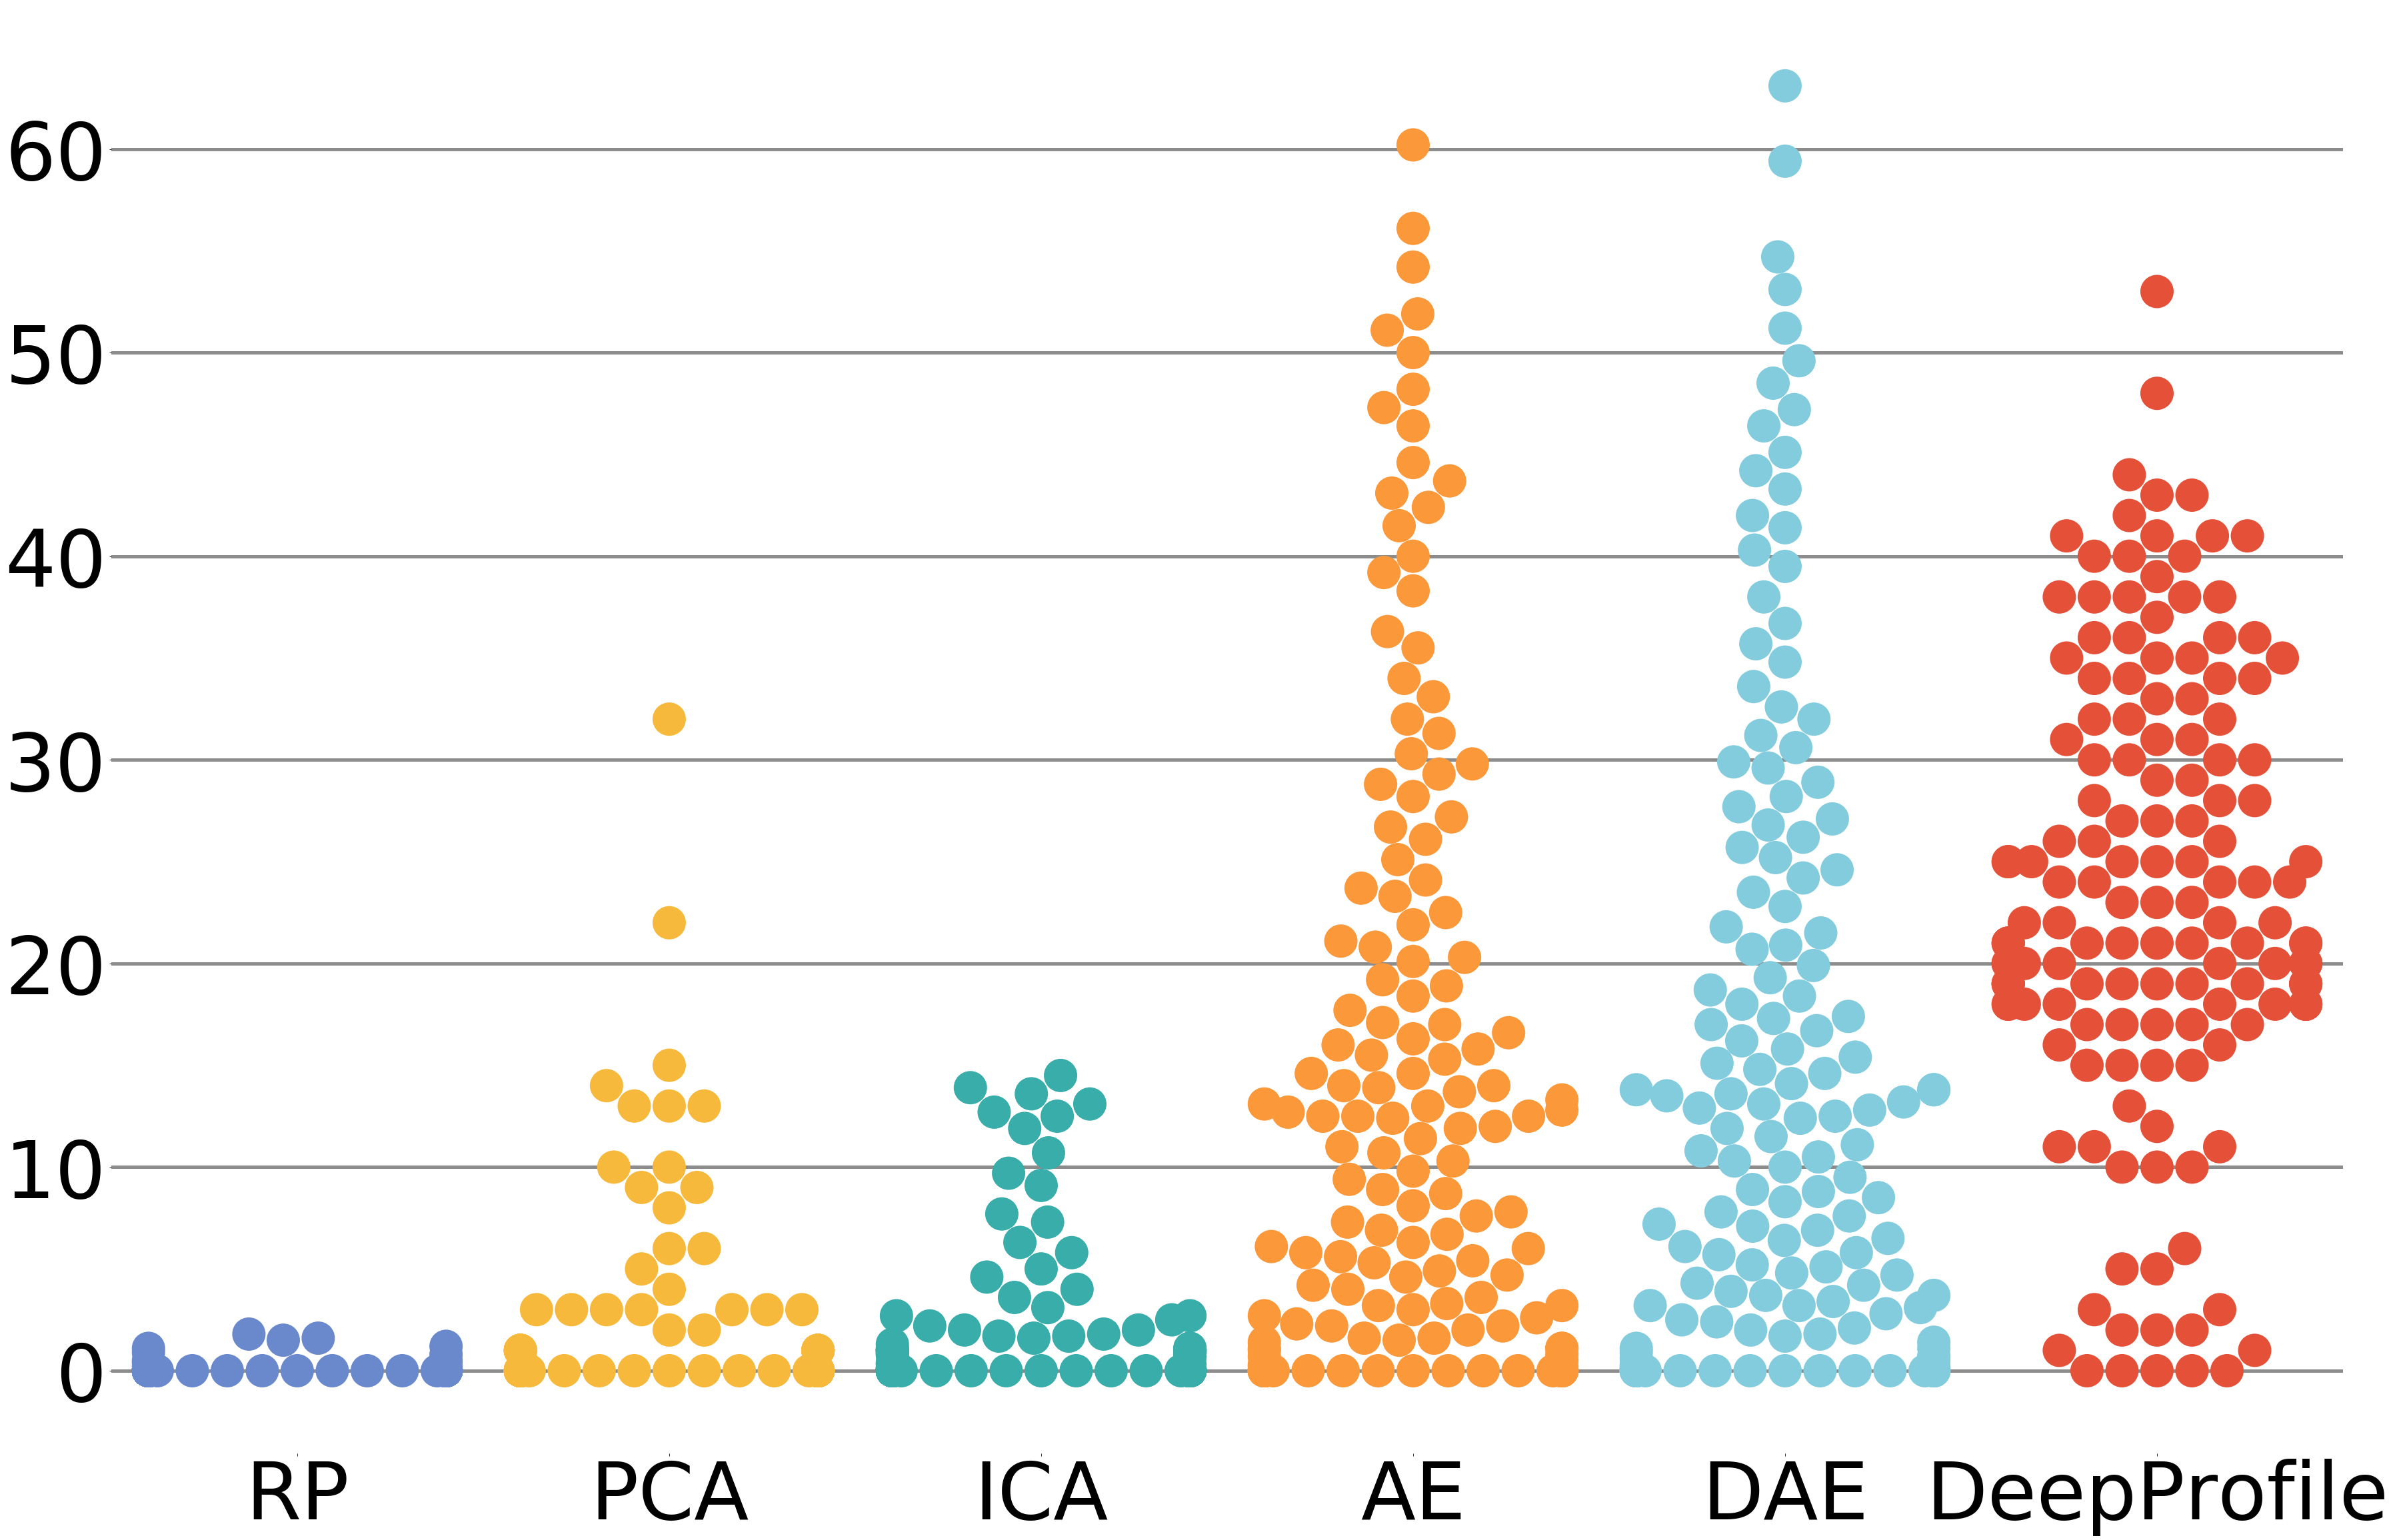

AML
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-value

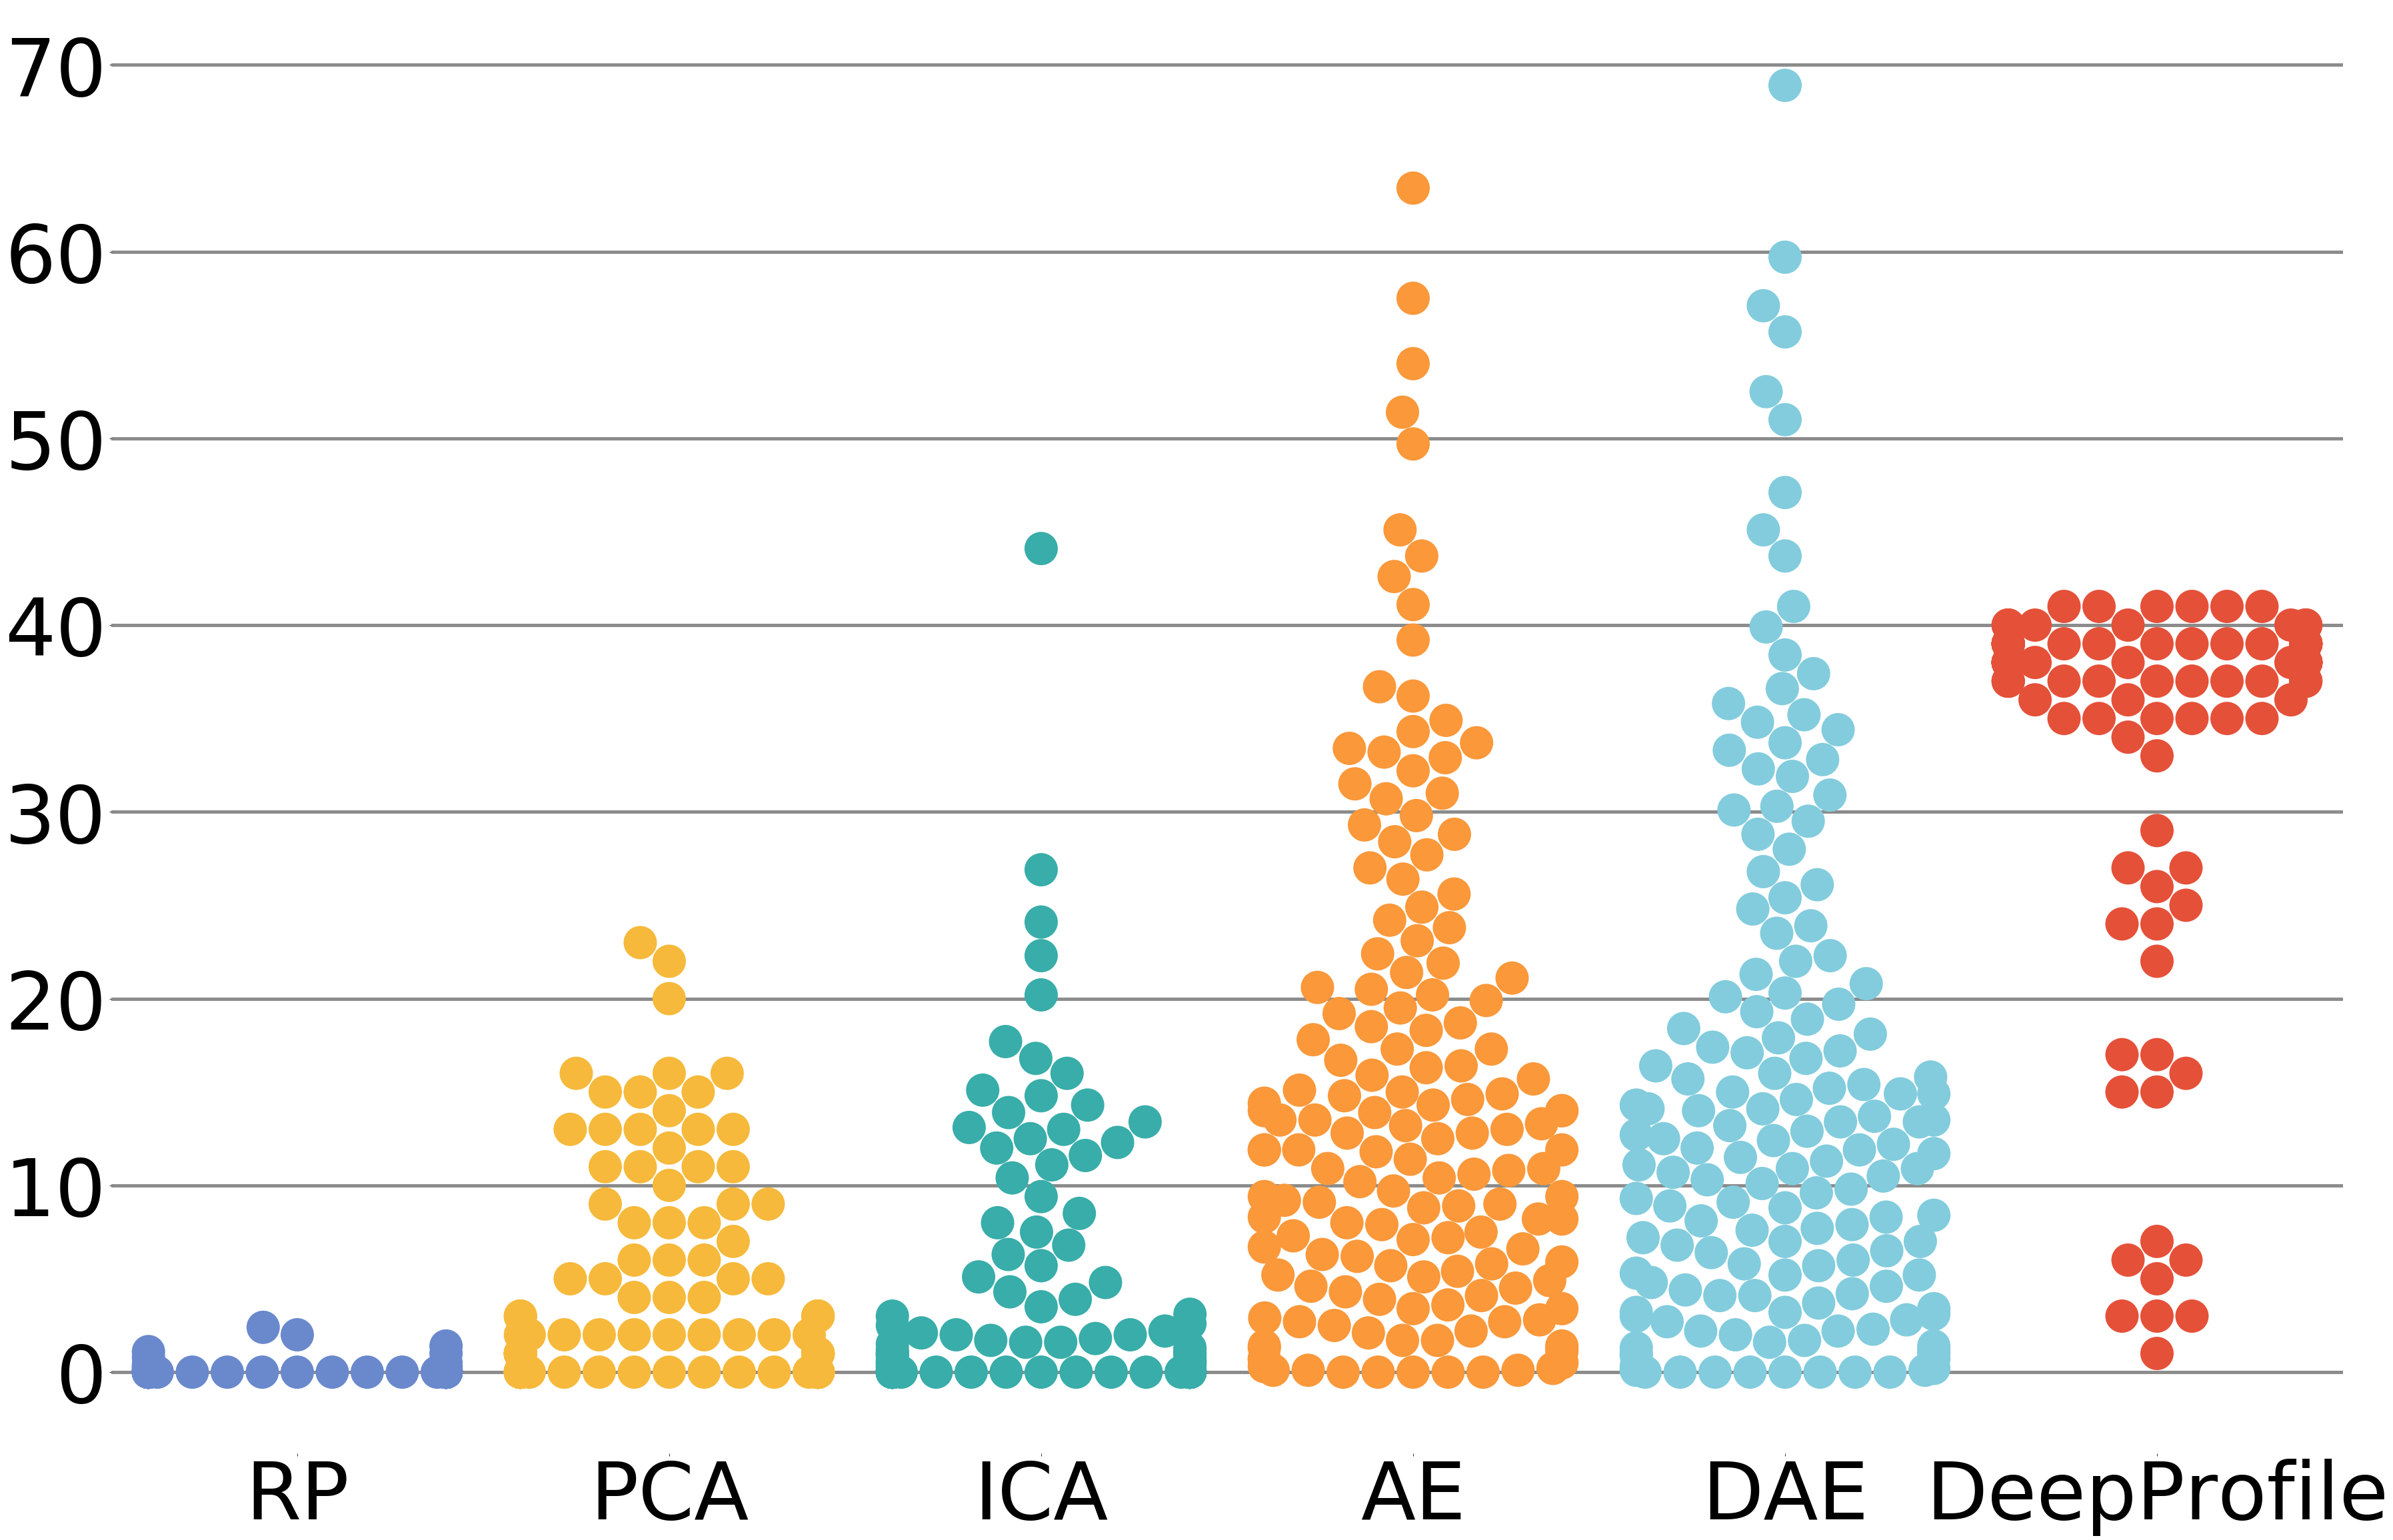

COLON
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-val

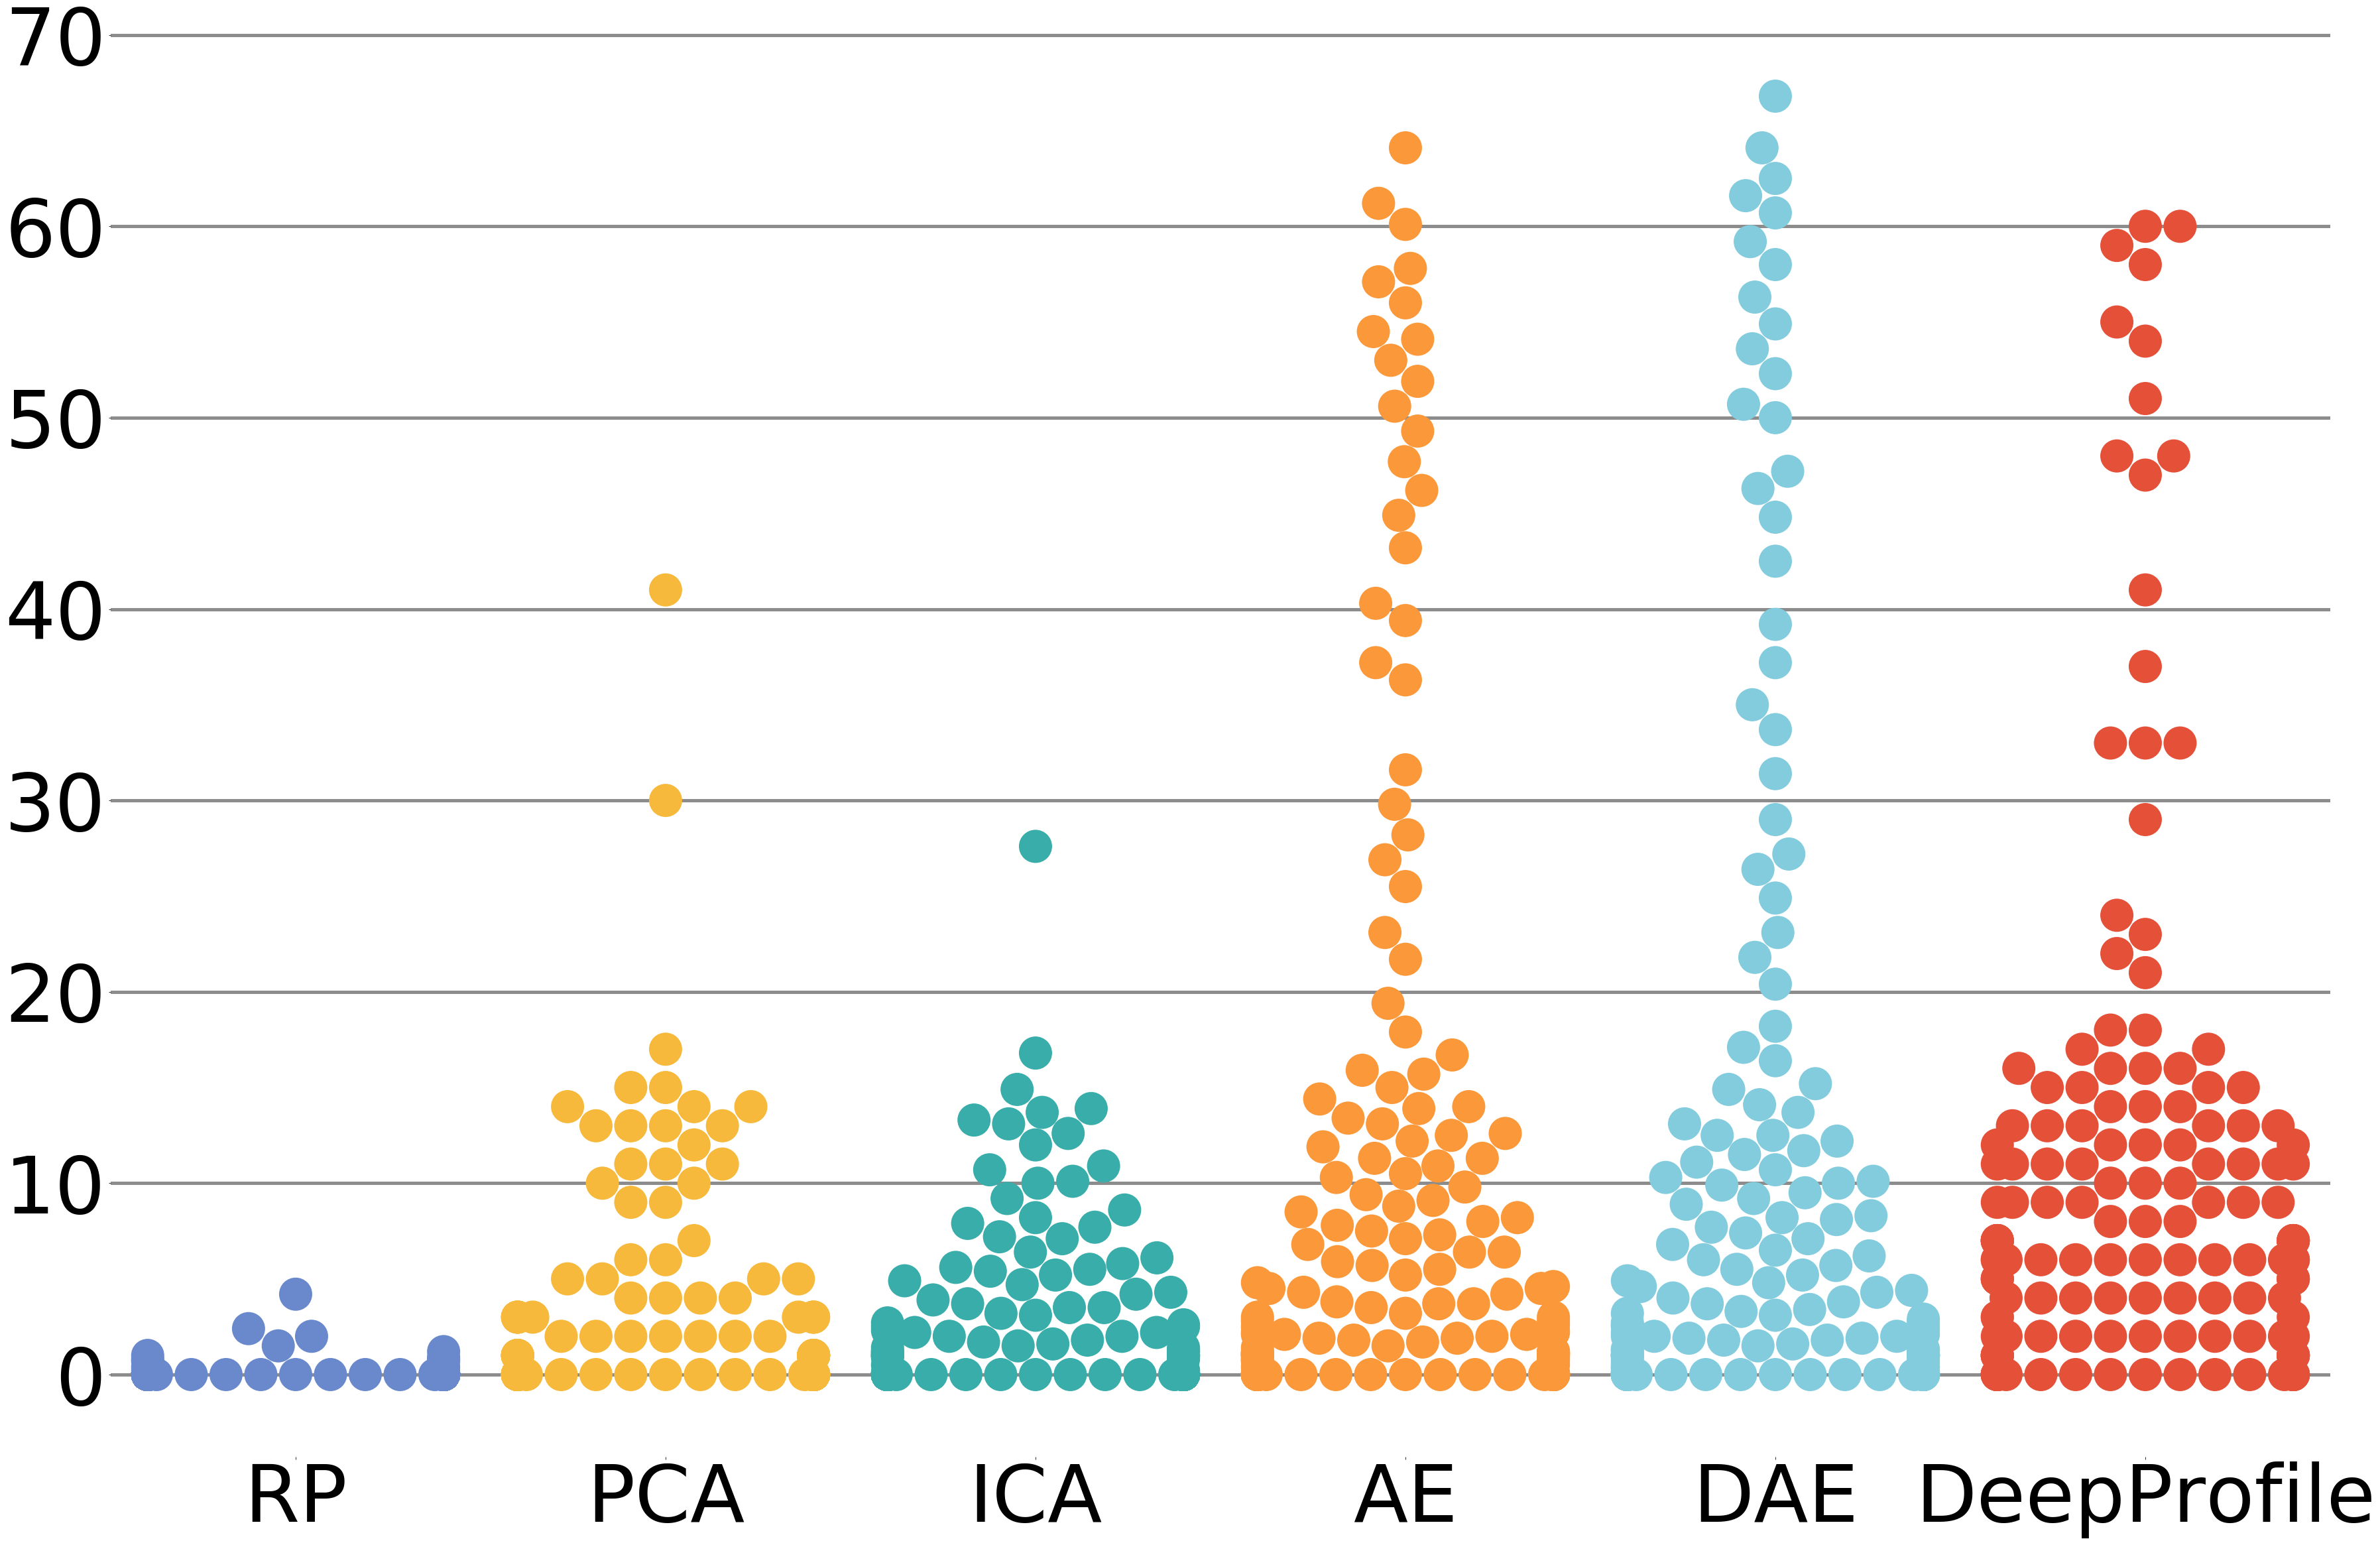

LUNG
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-valu

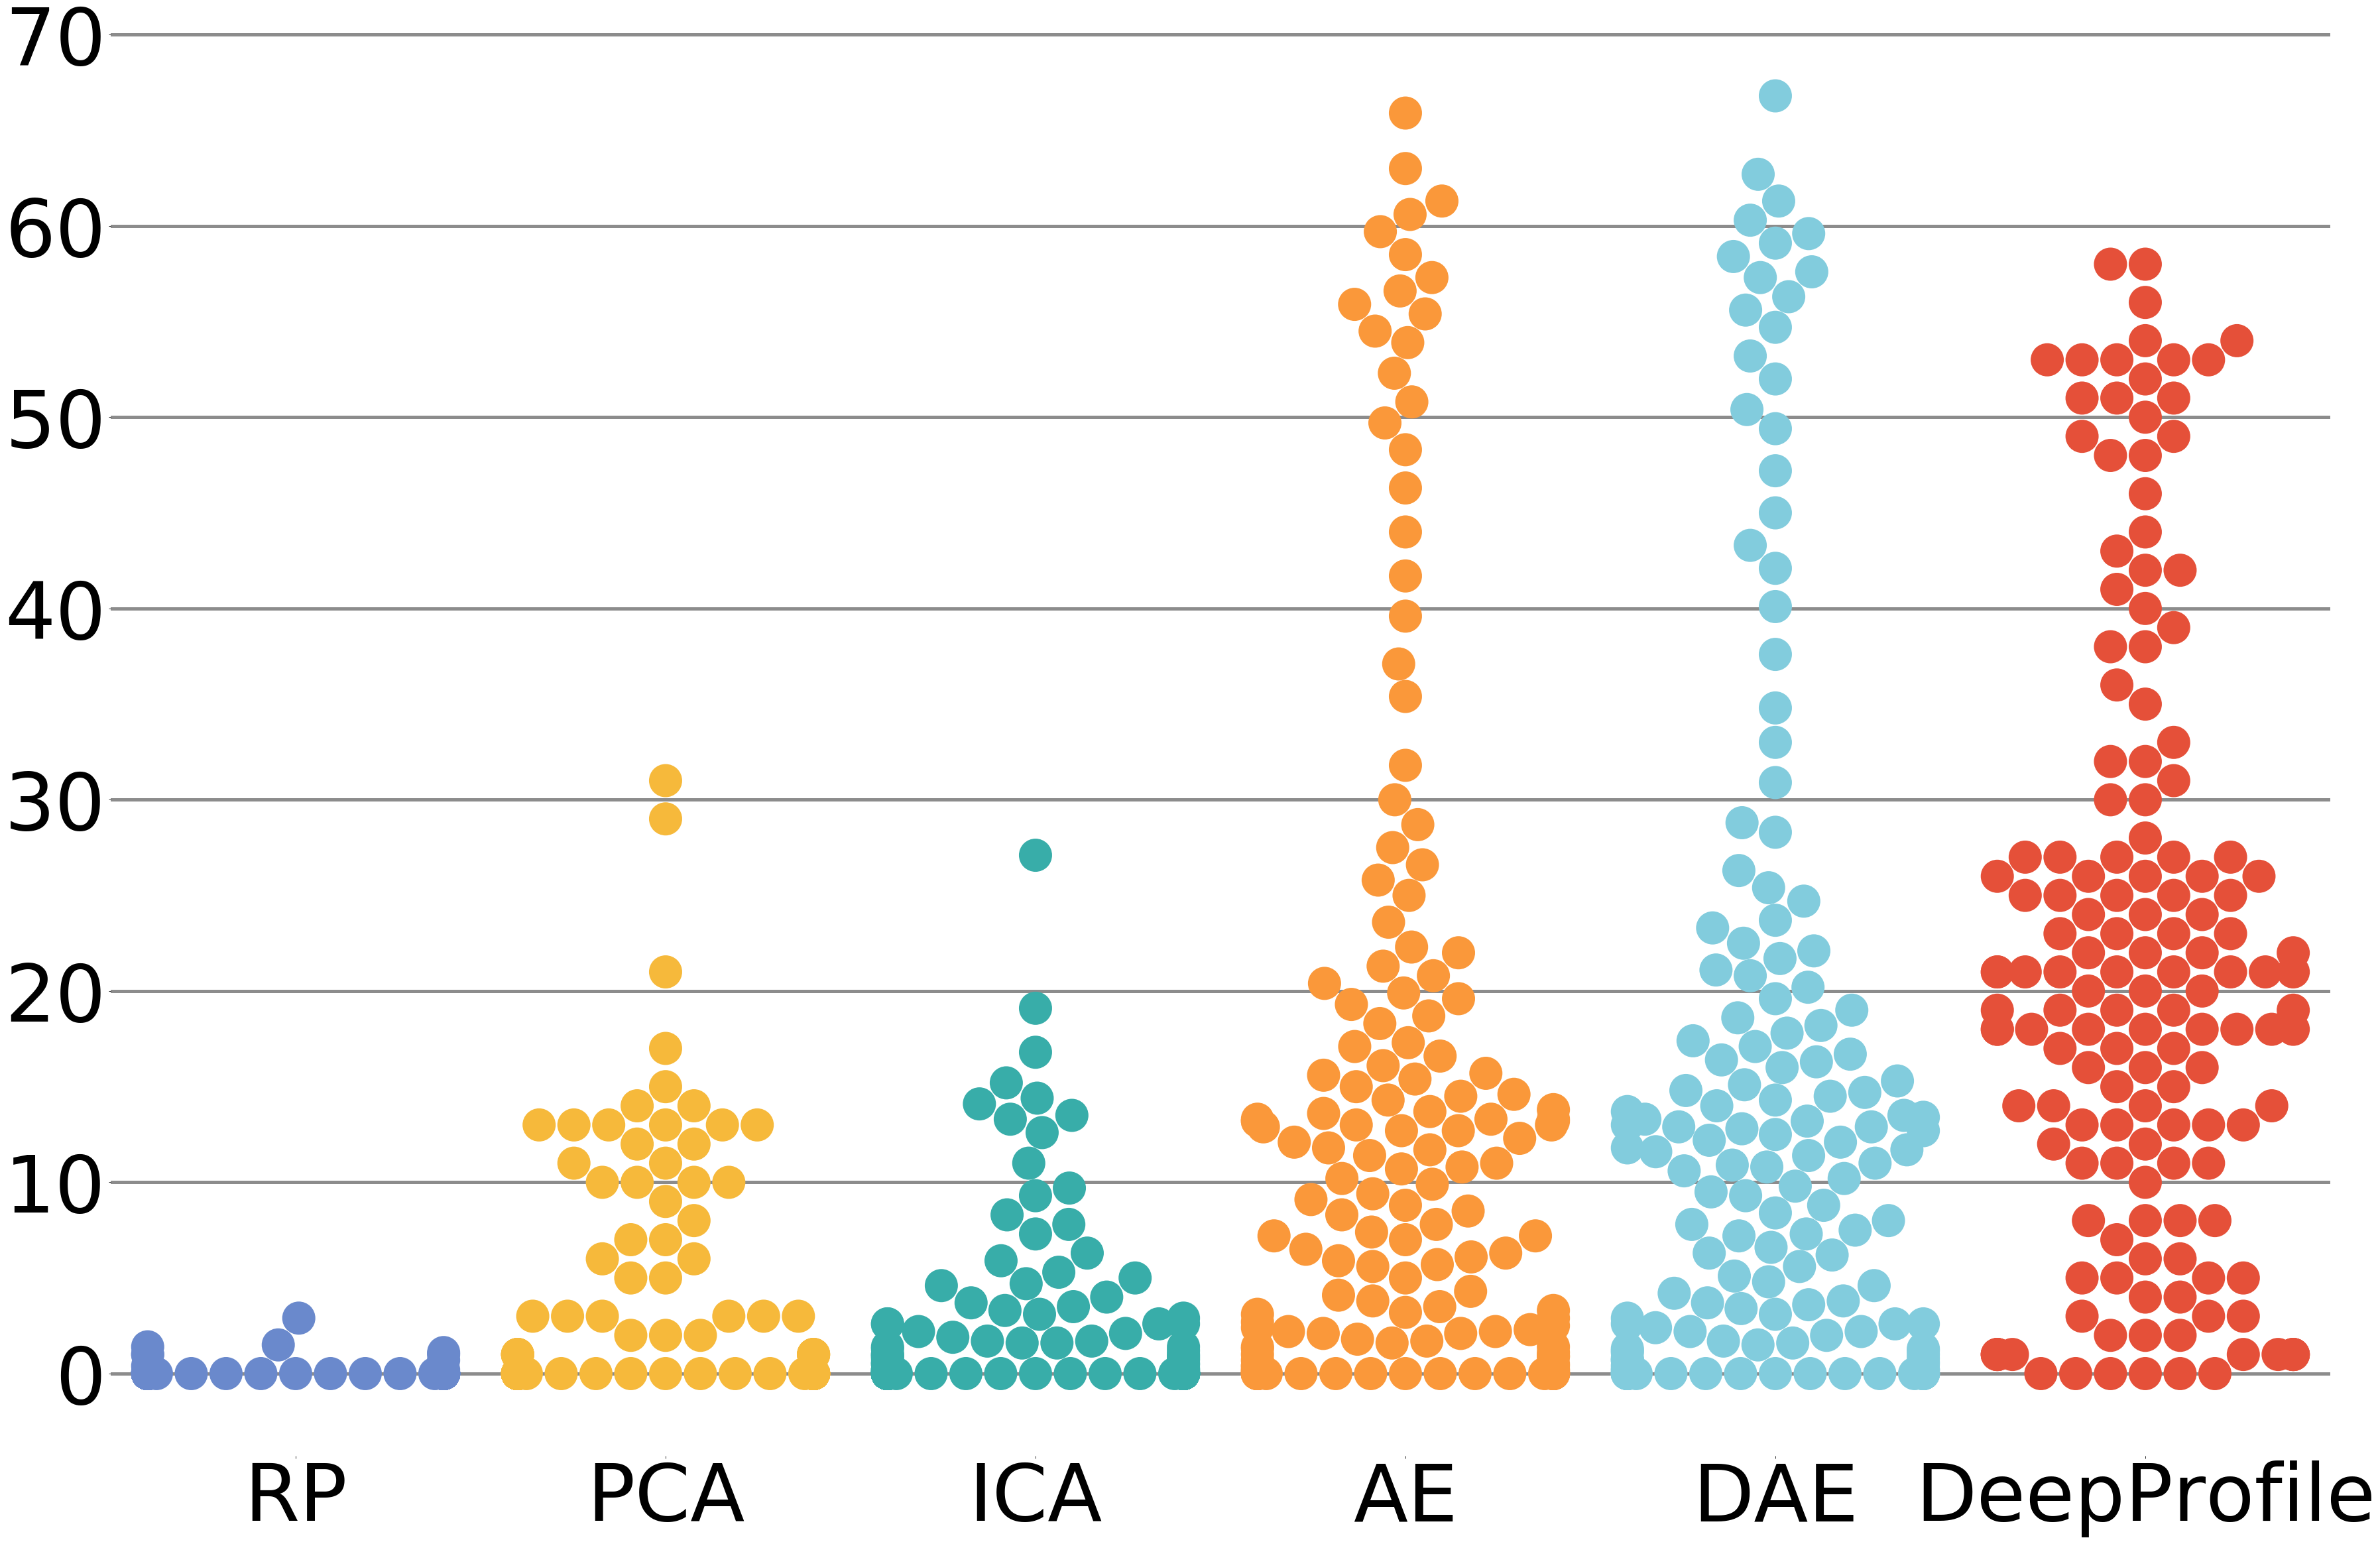

BRAIN
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-val

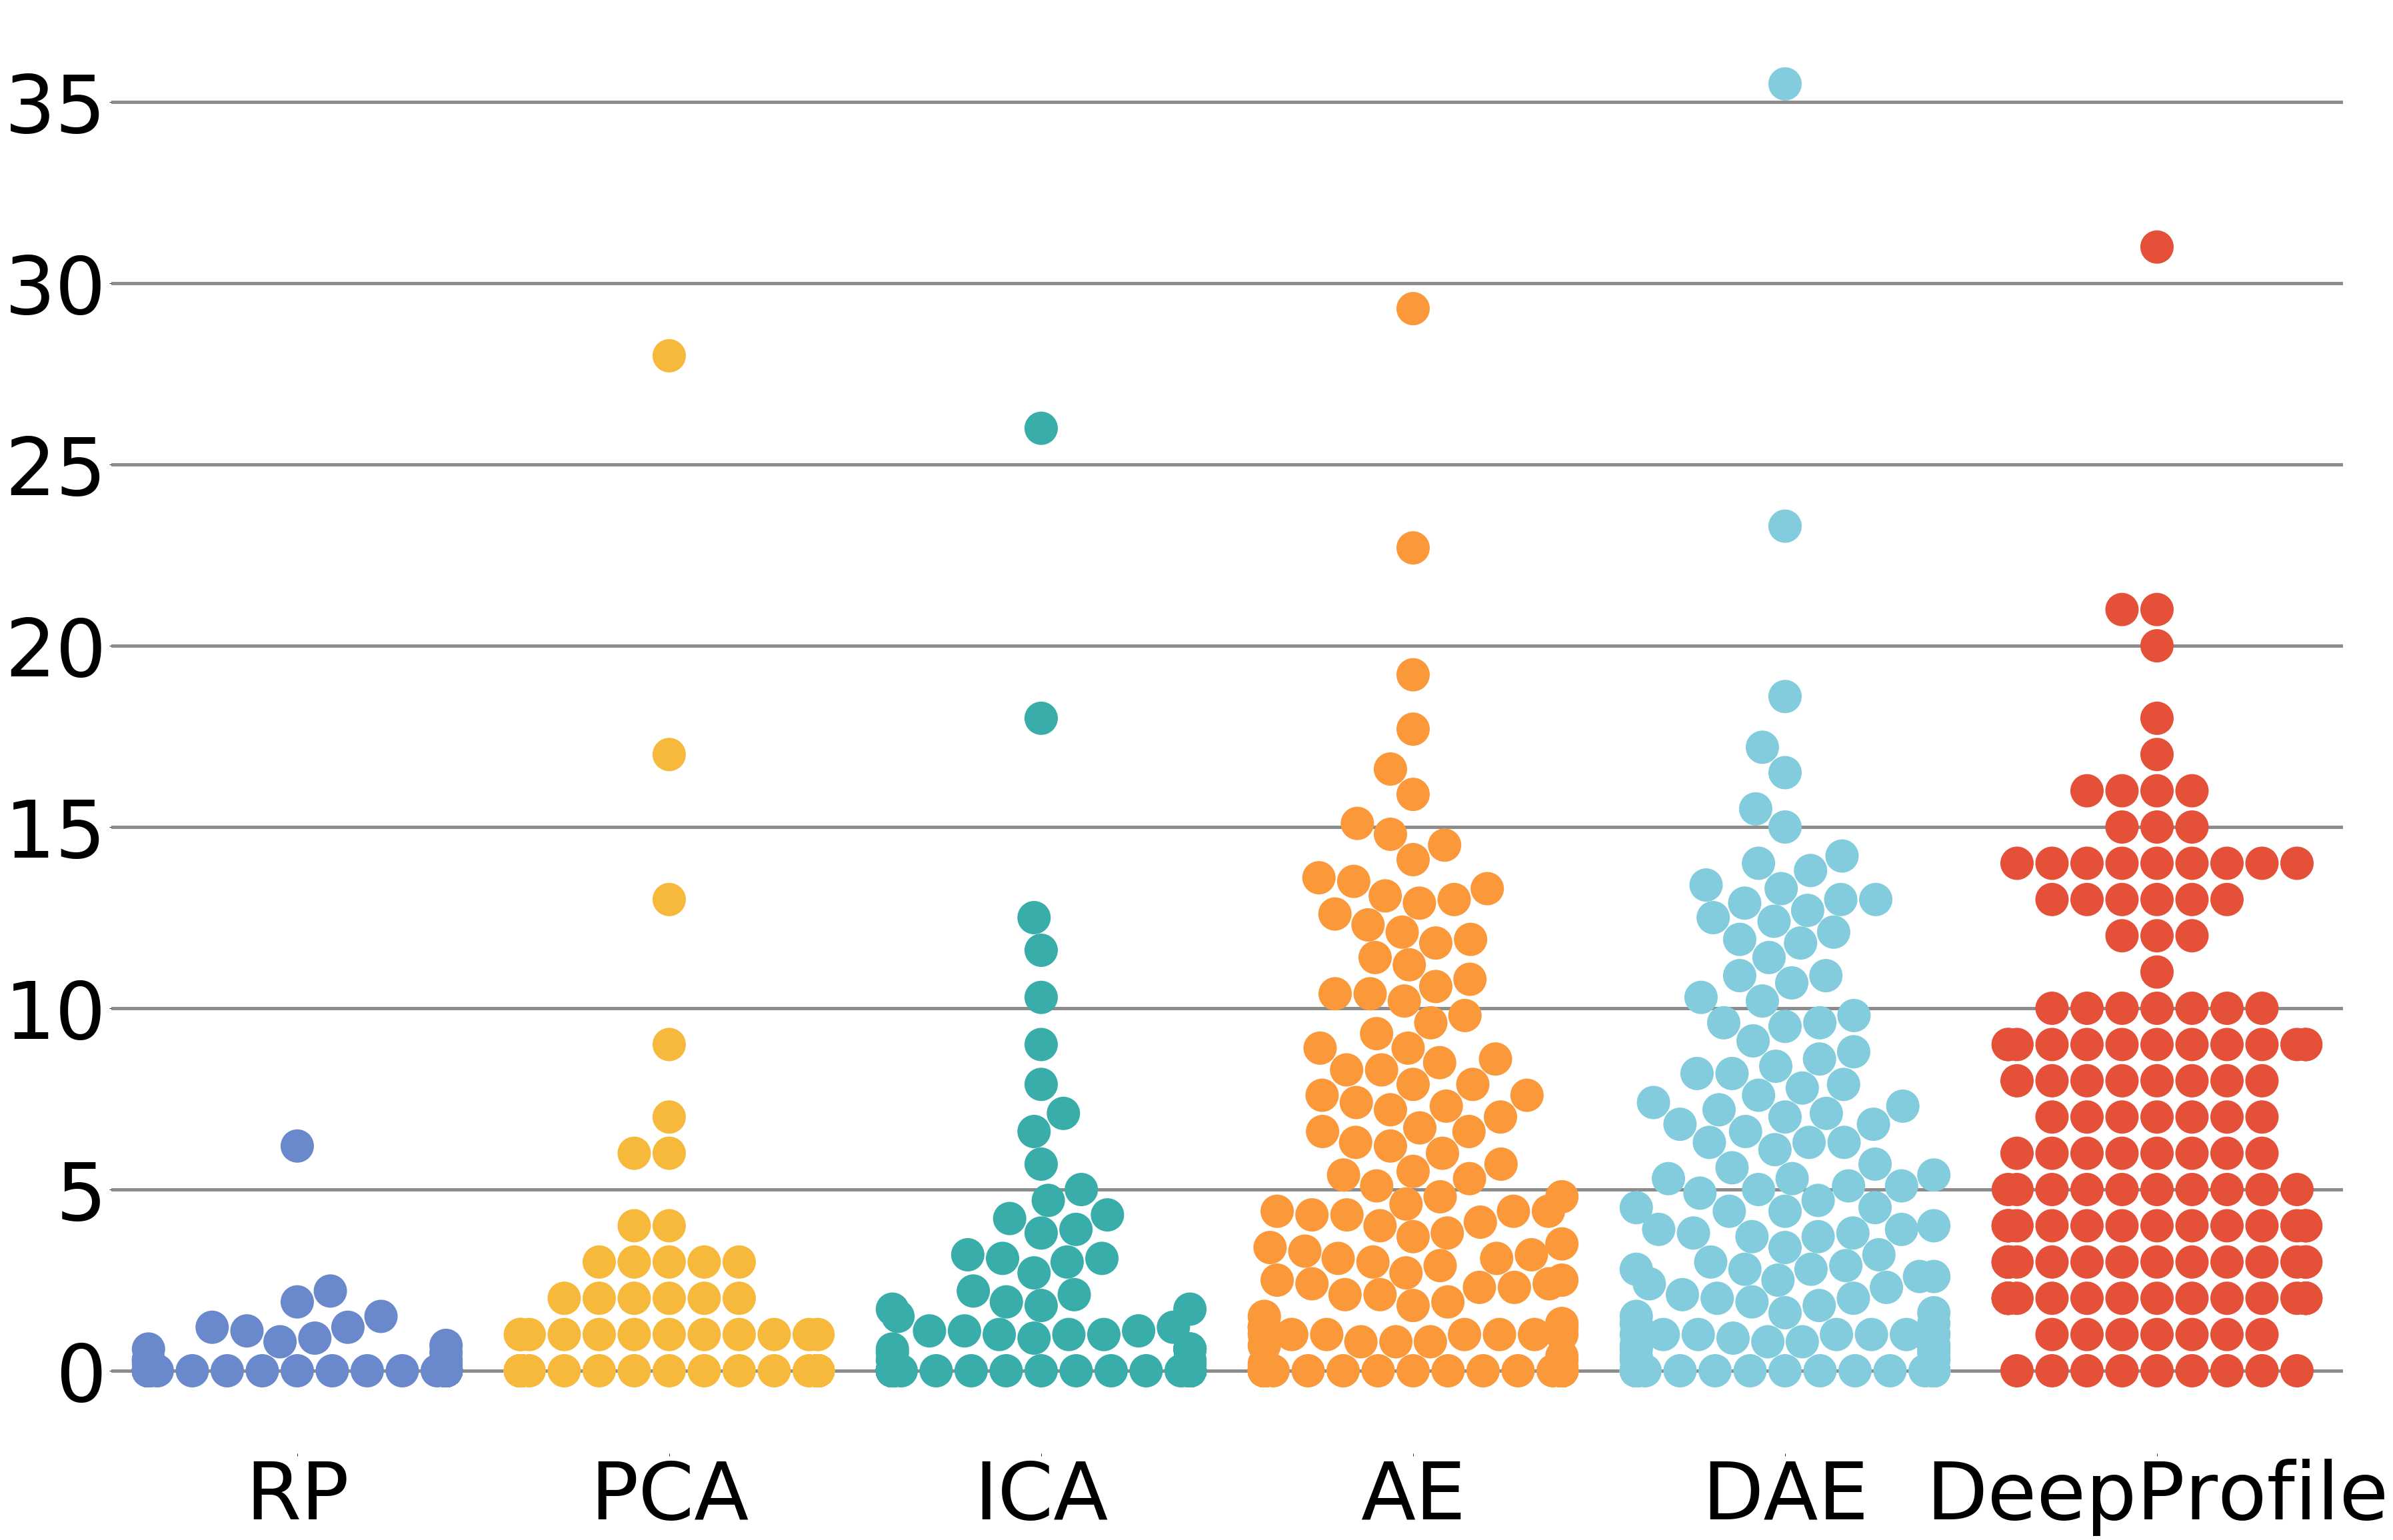

OV
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values

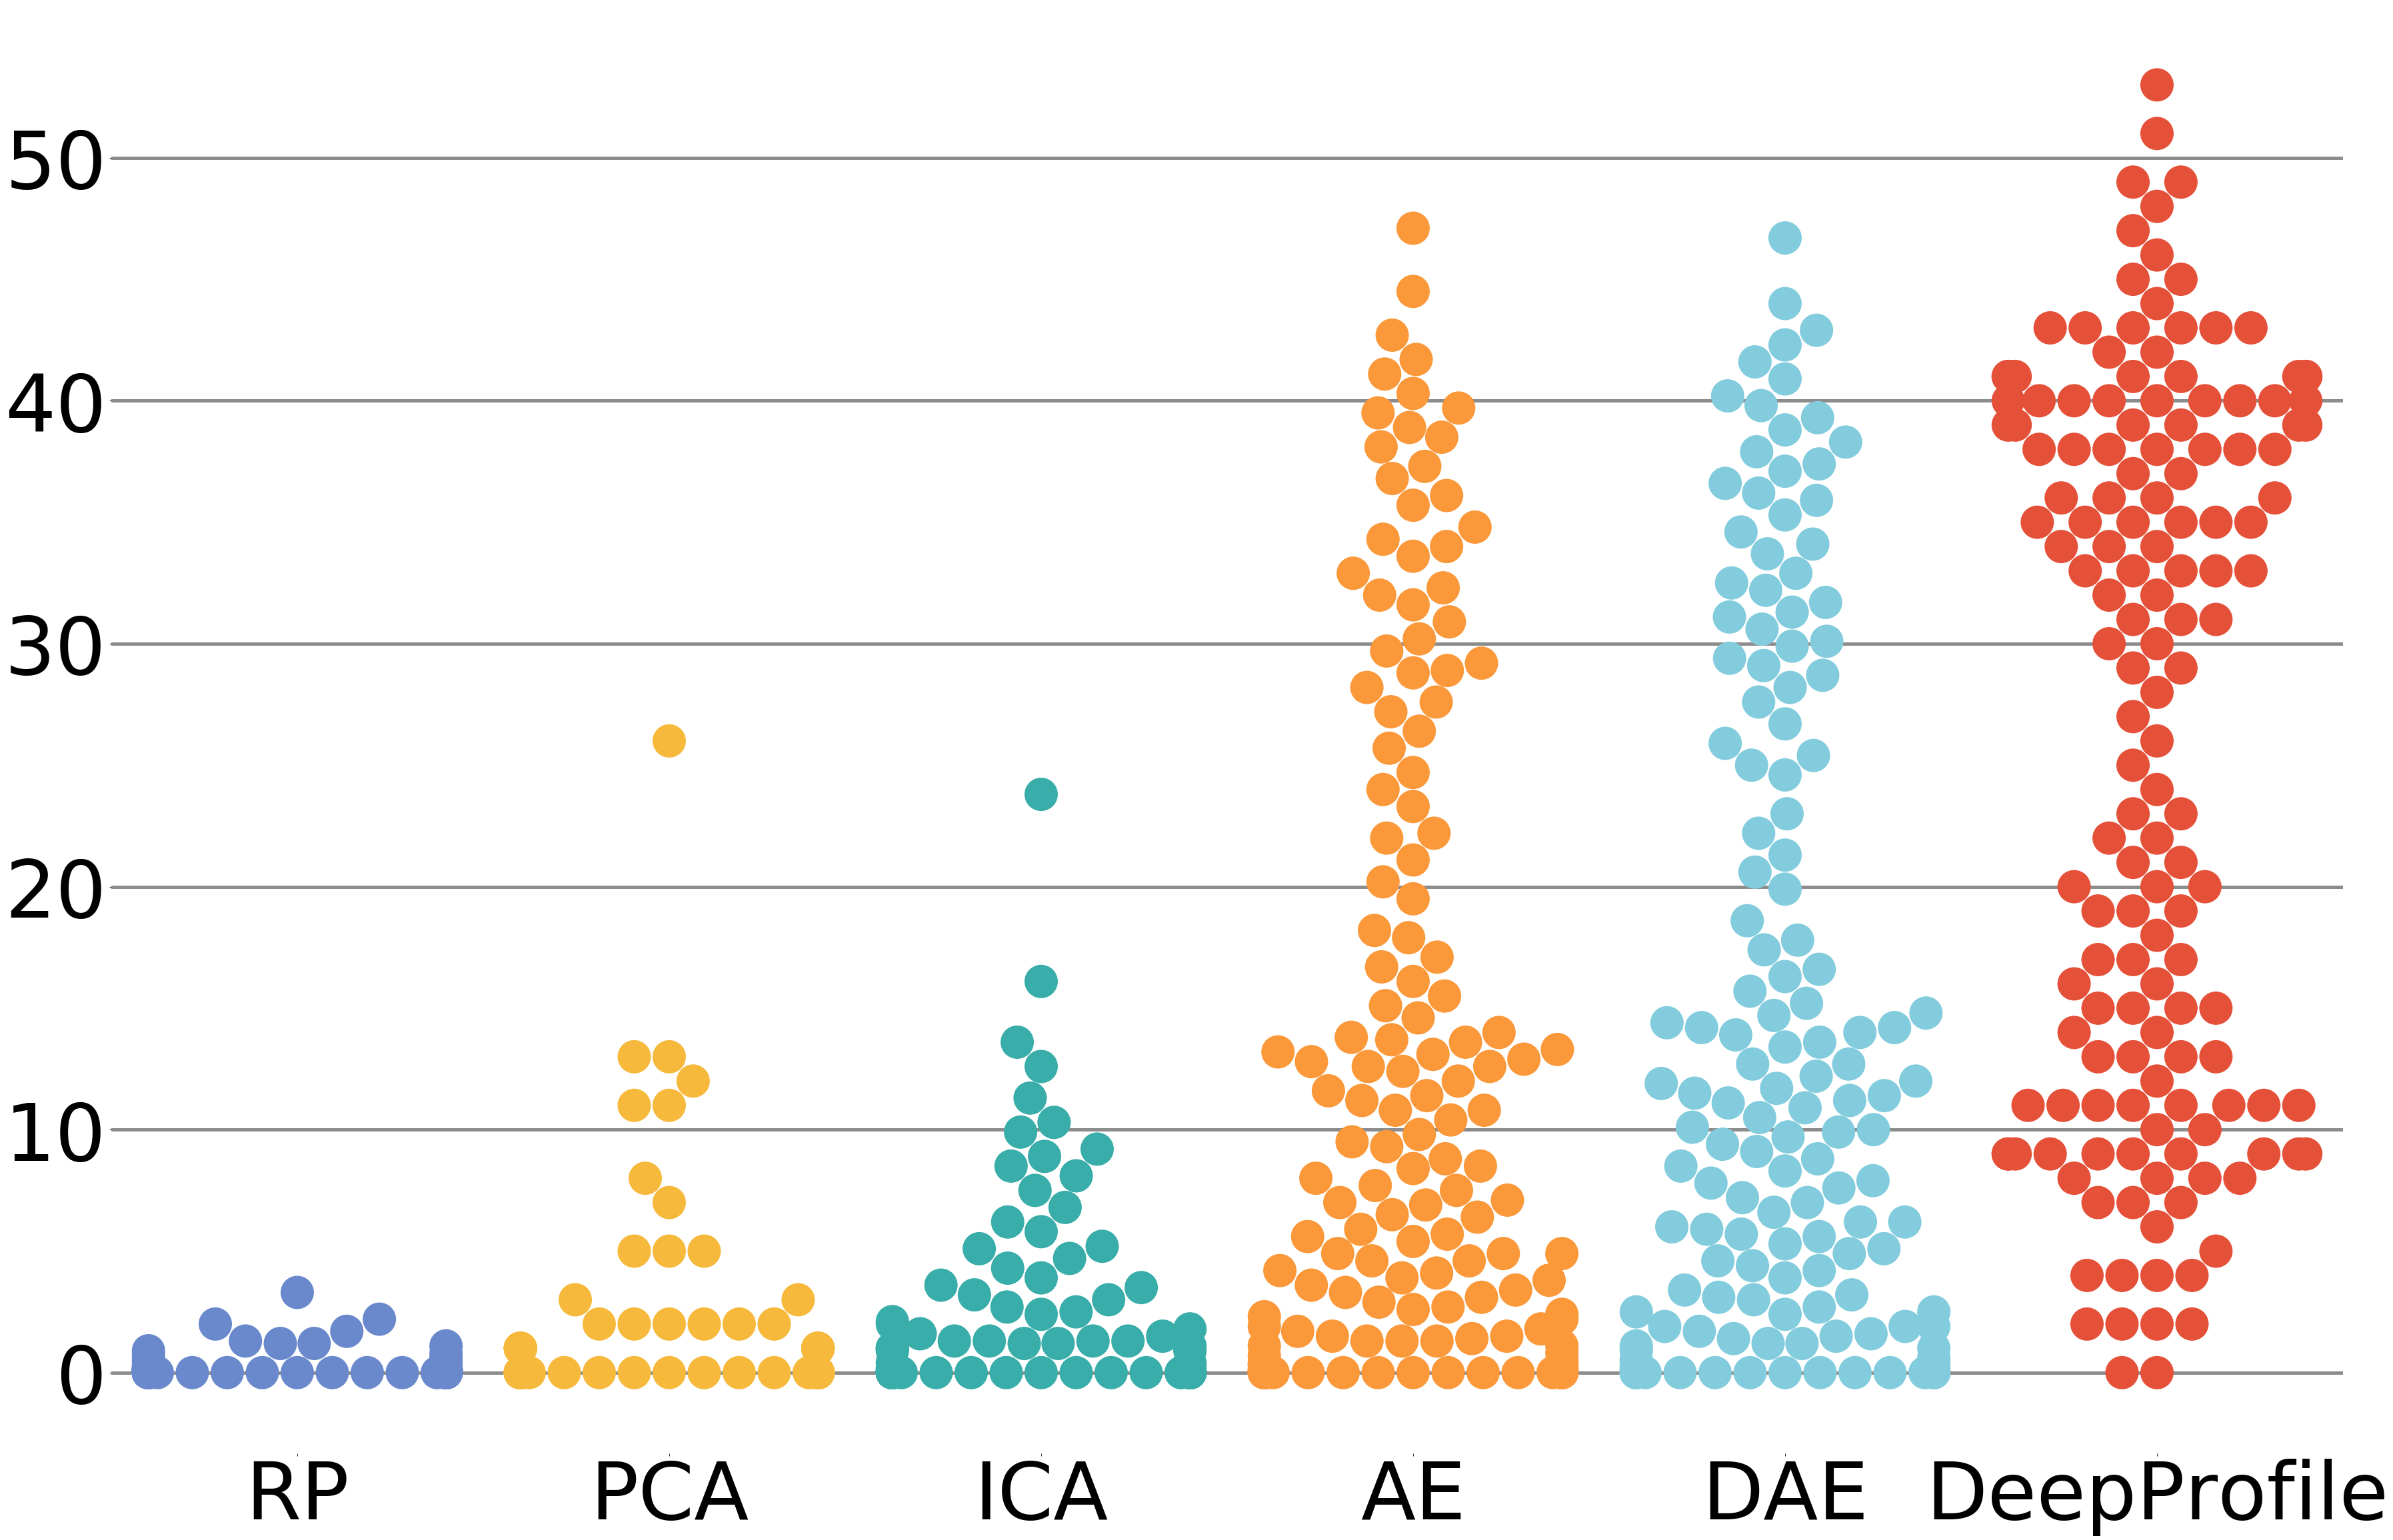

SARCOMA
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-v

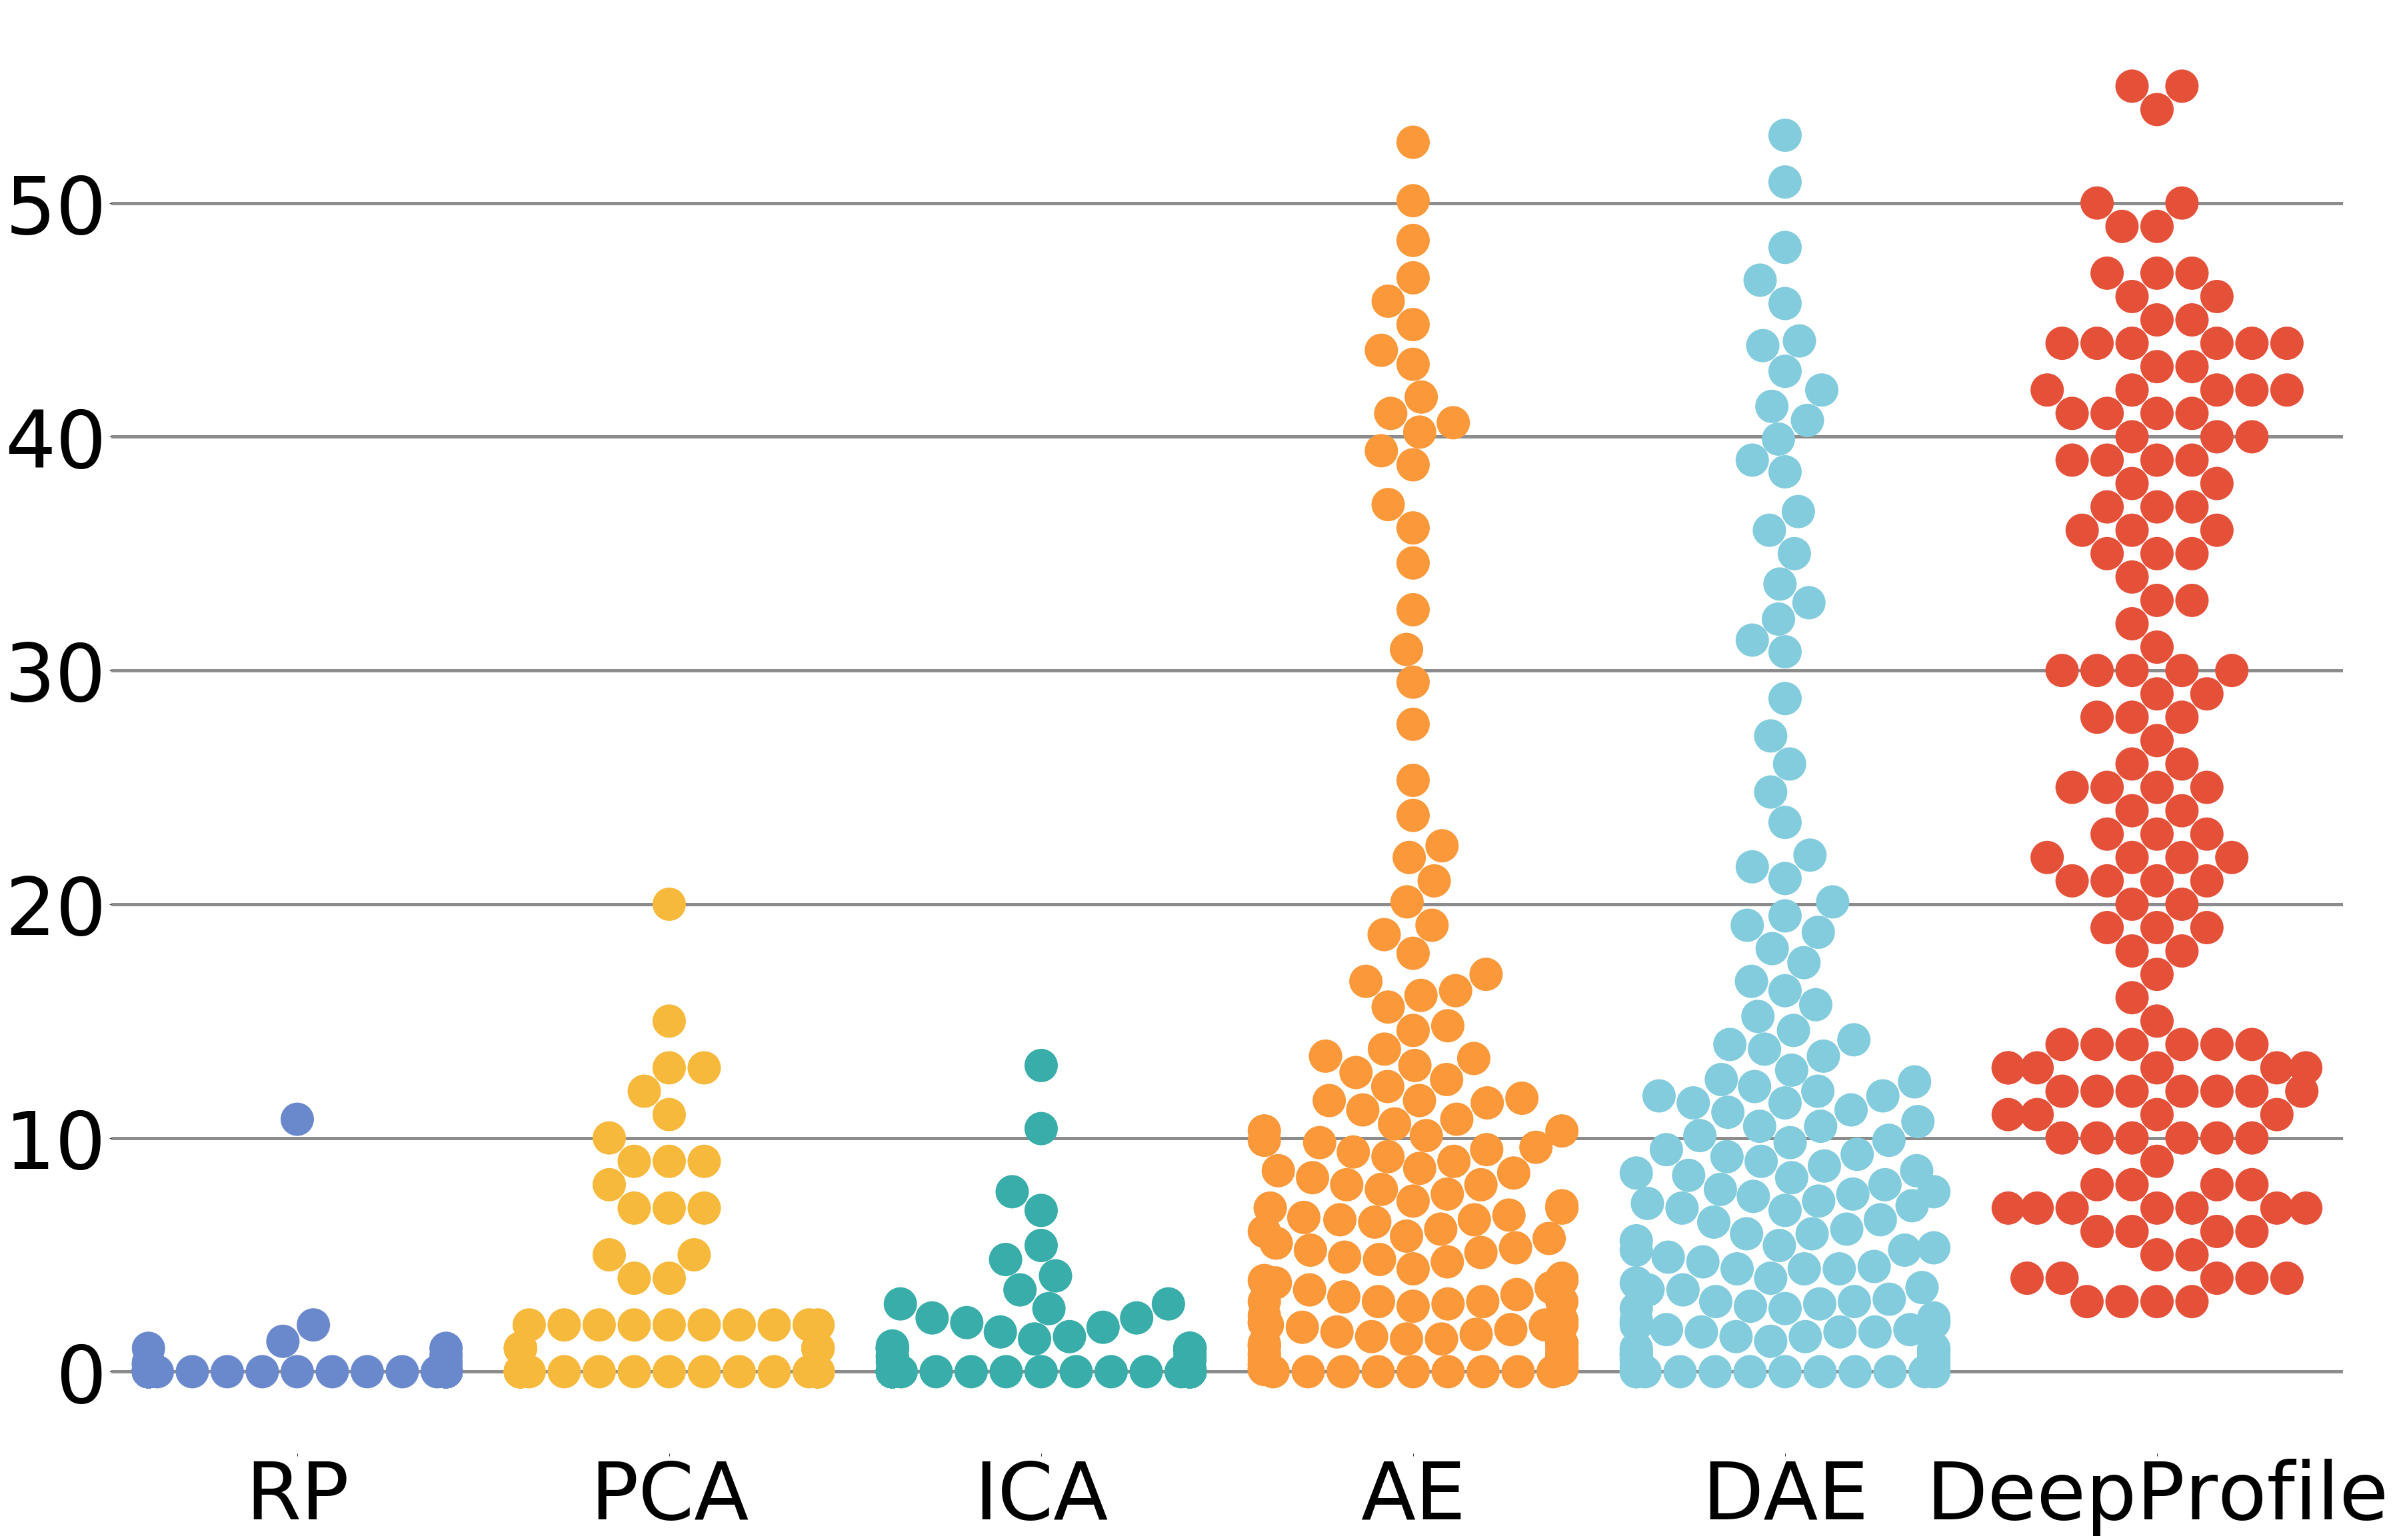

KIDNEY
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-va

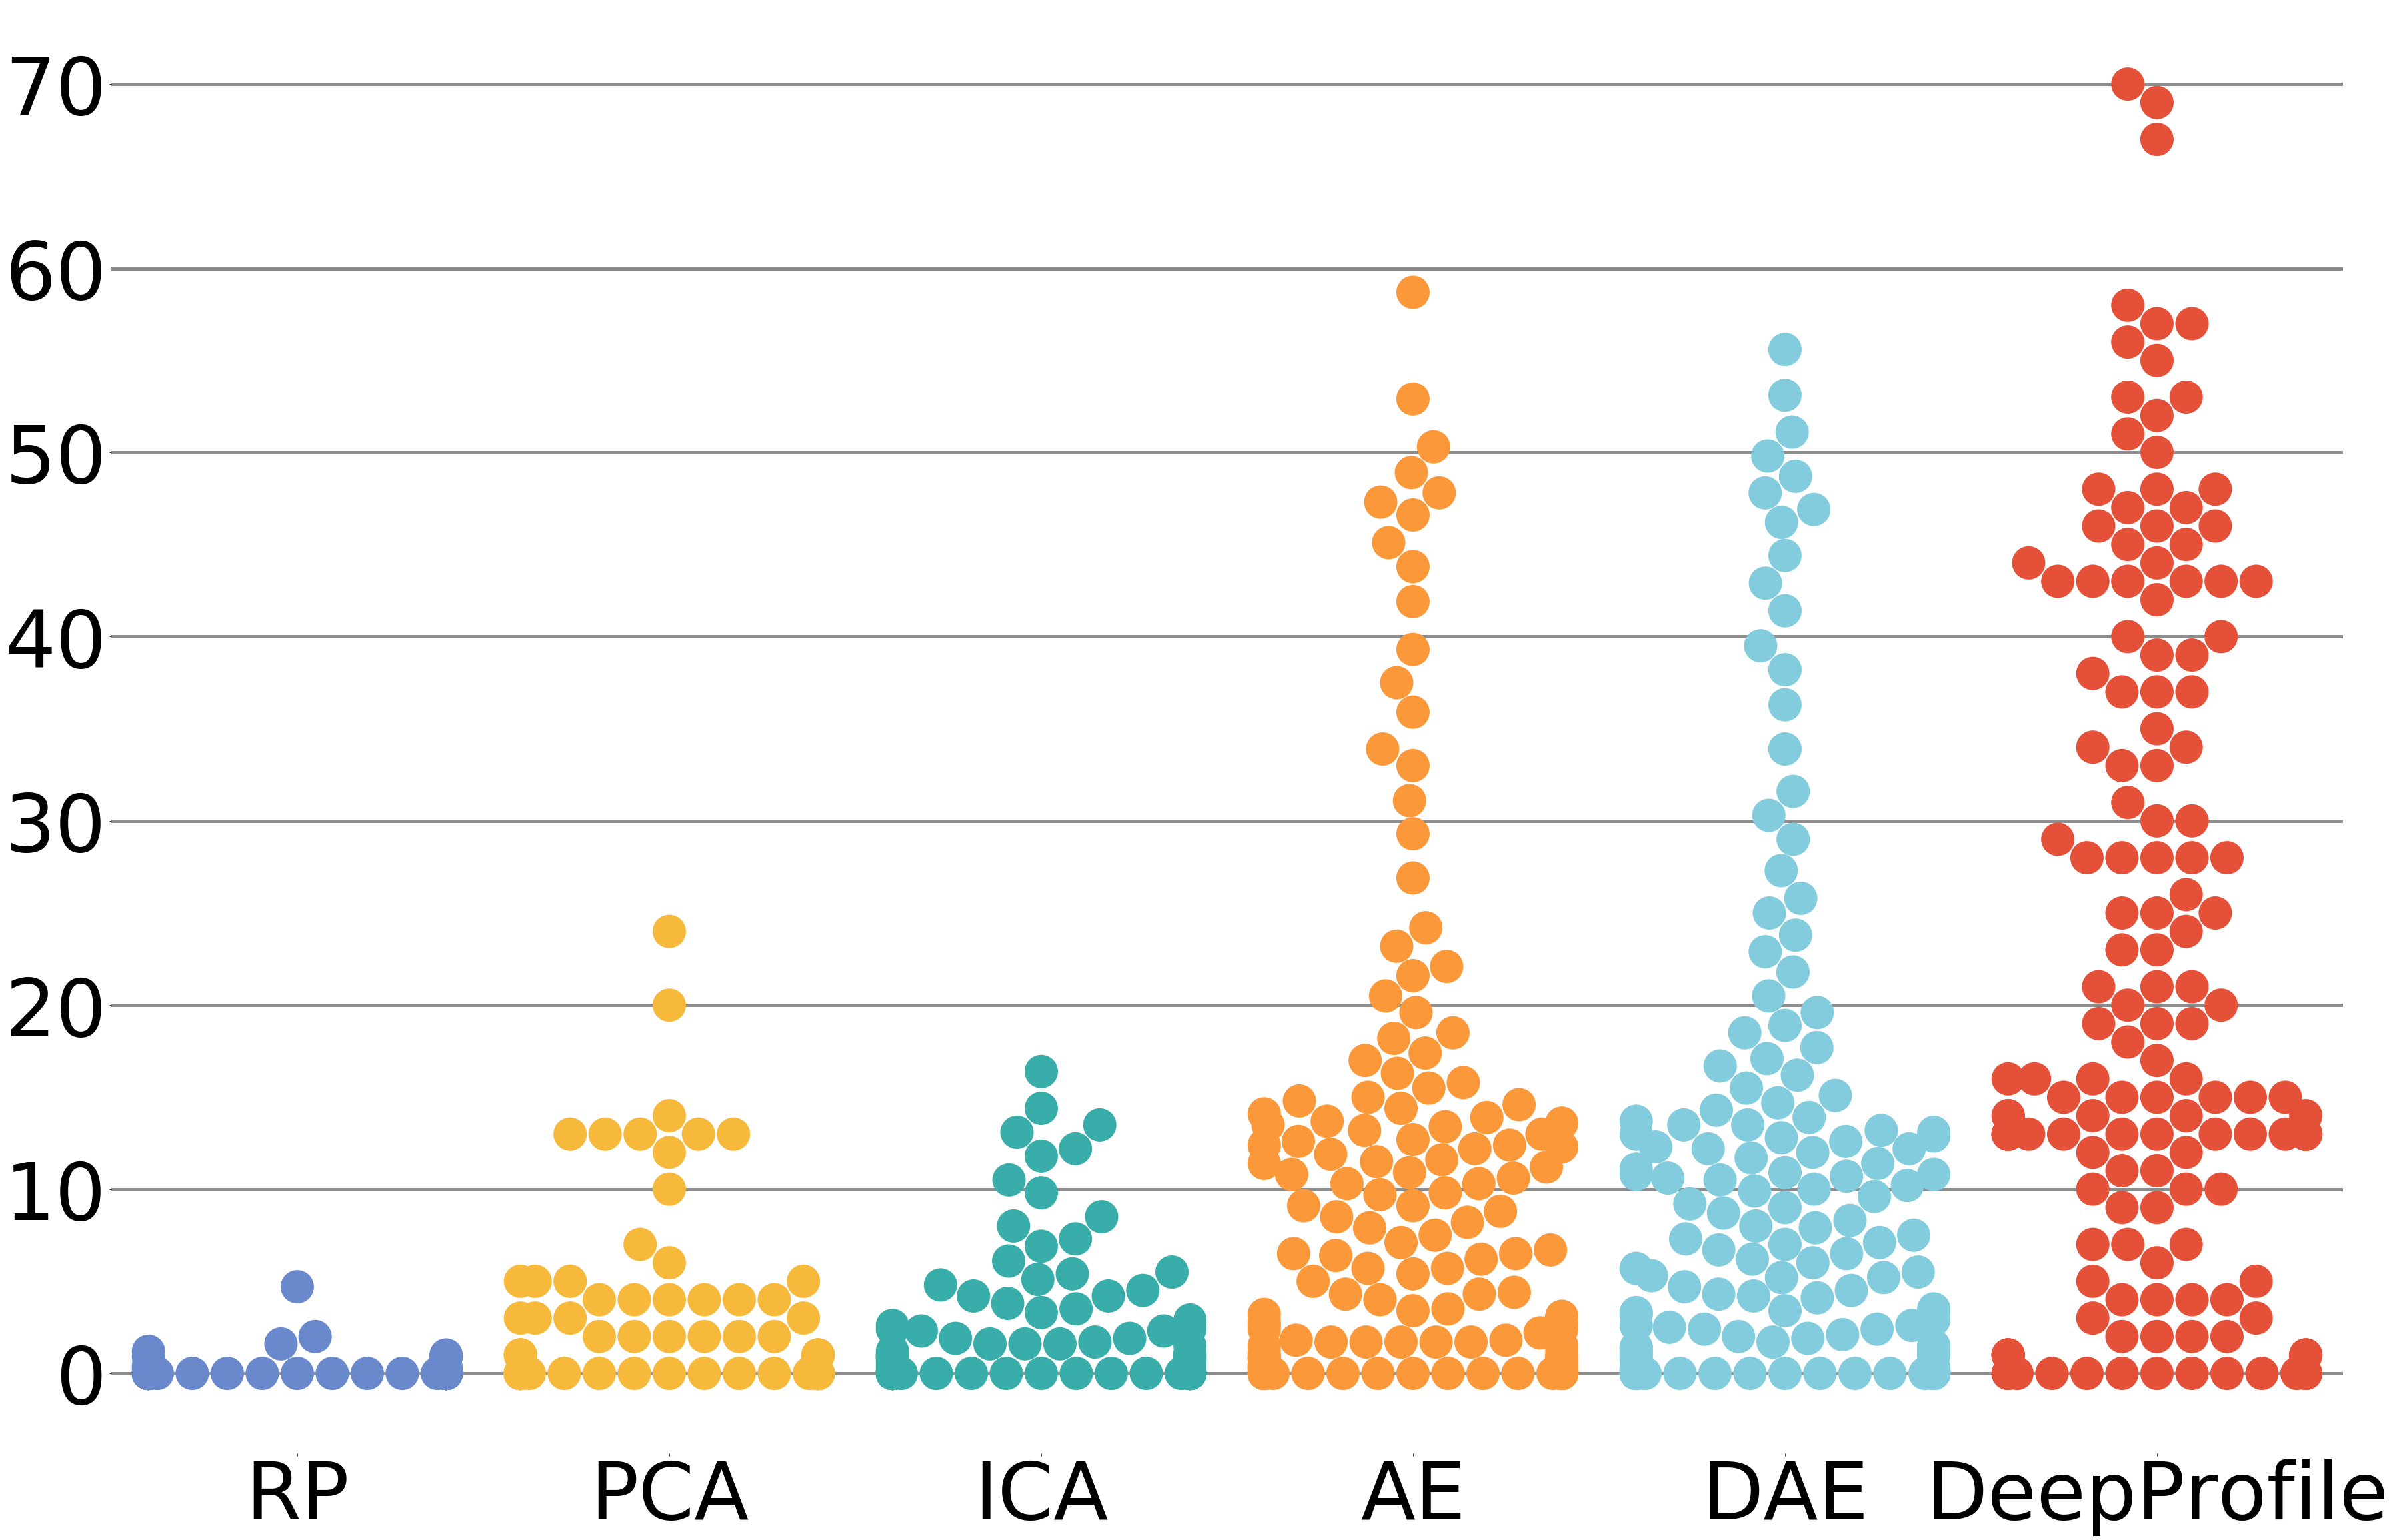

LIVER
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-val

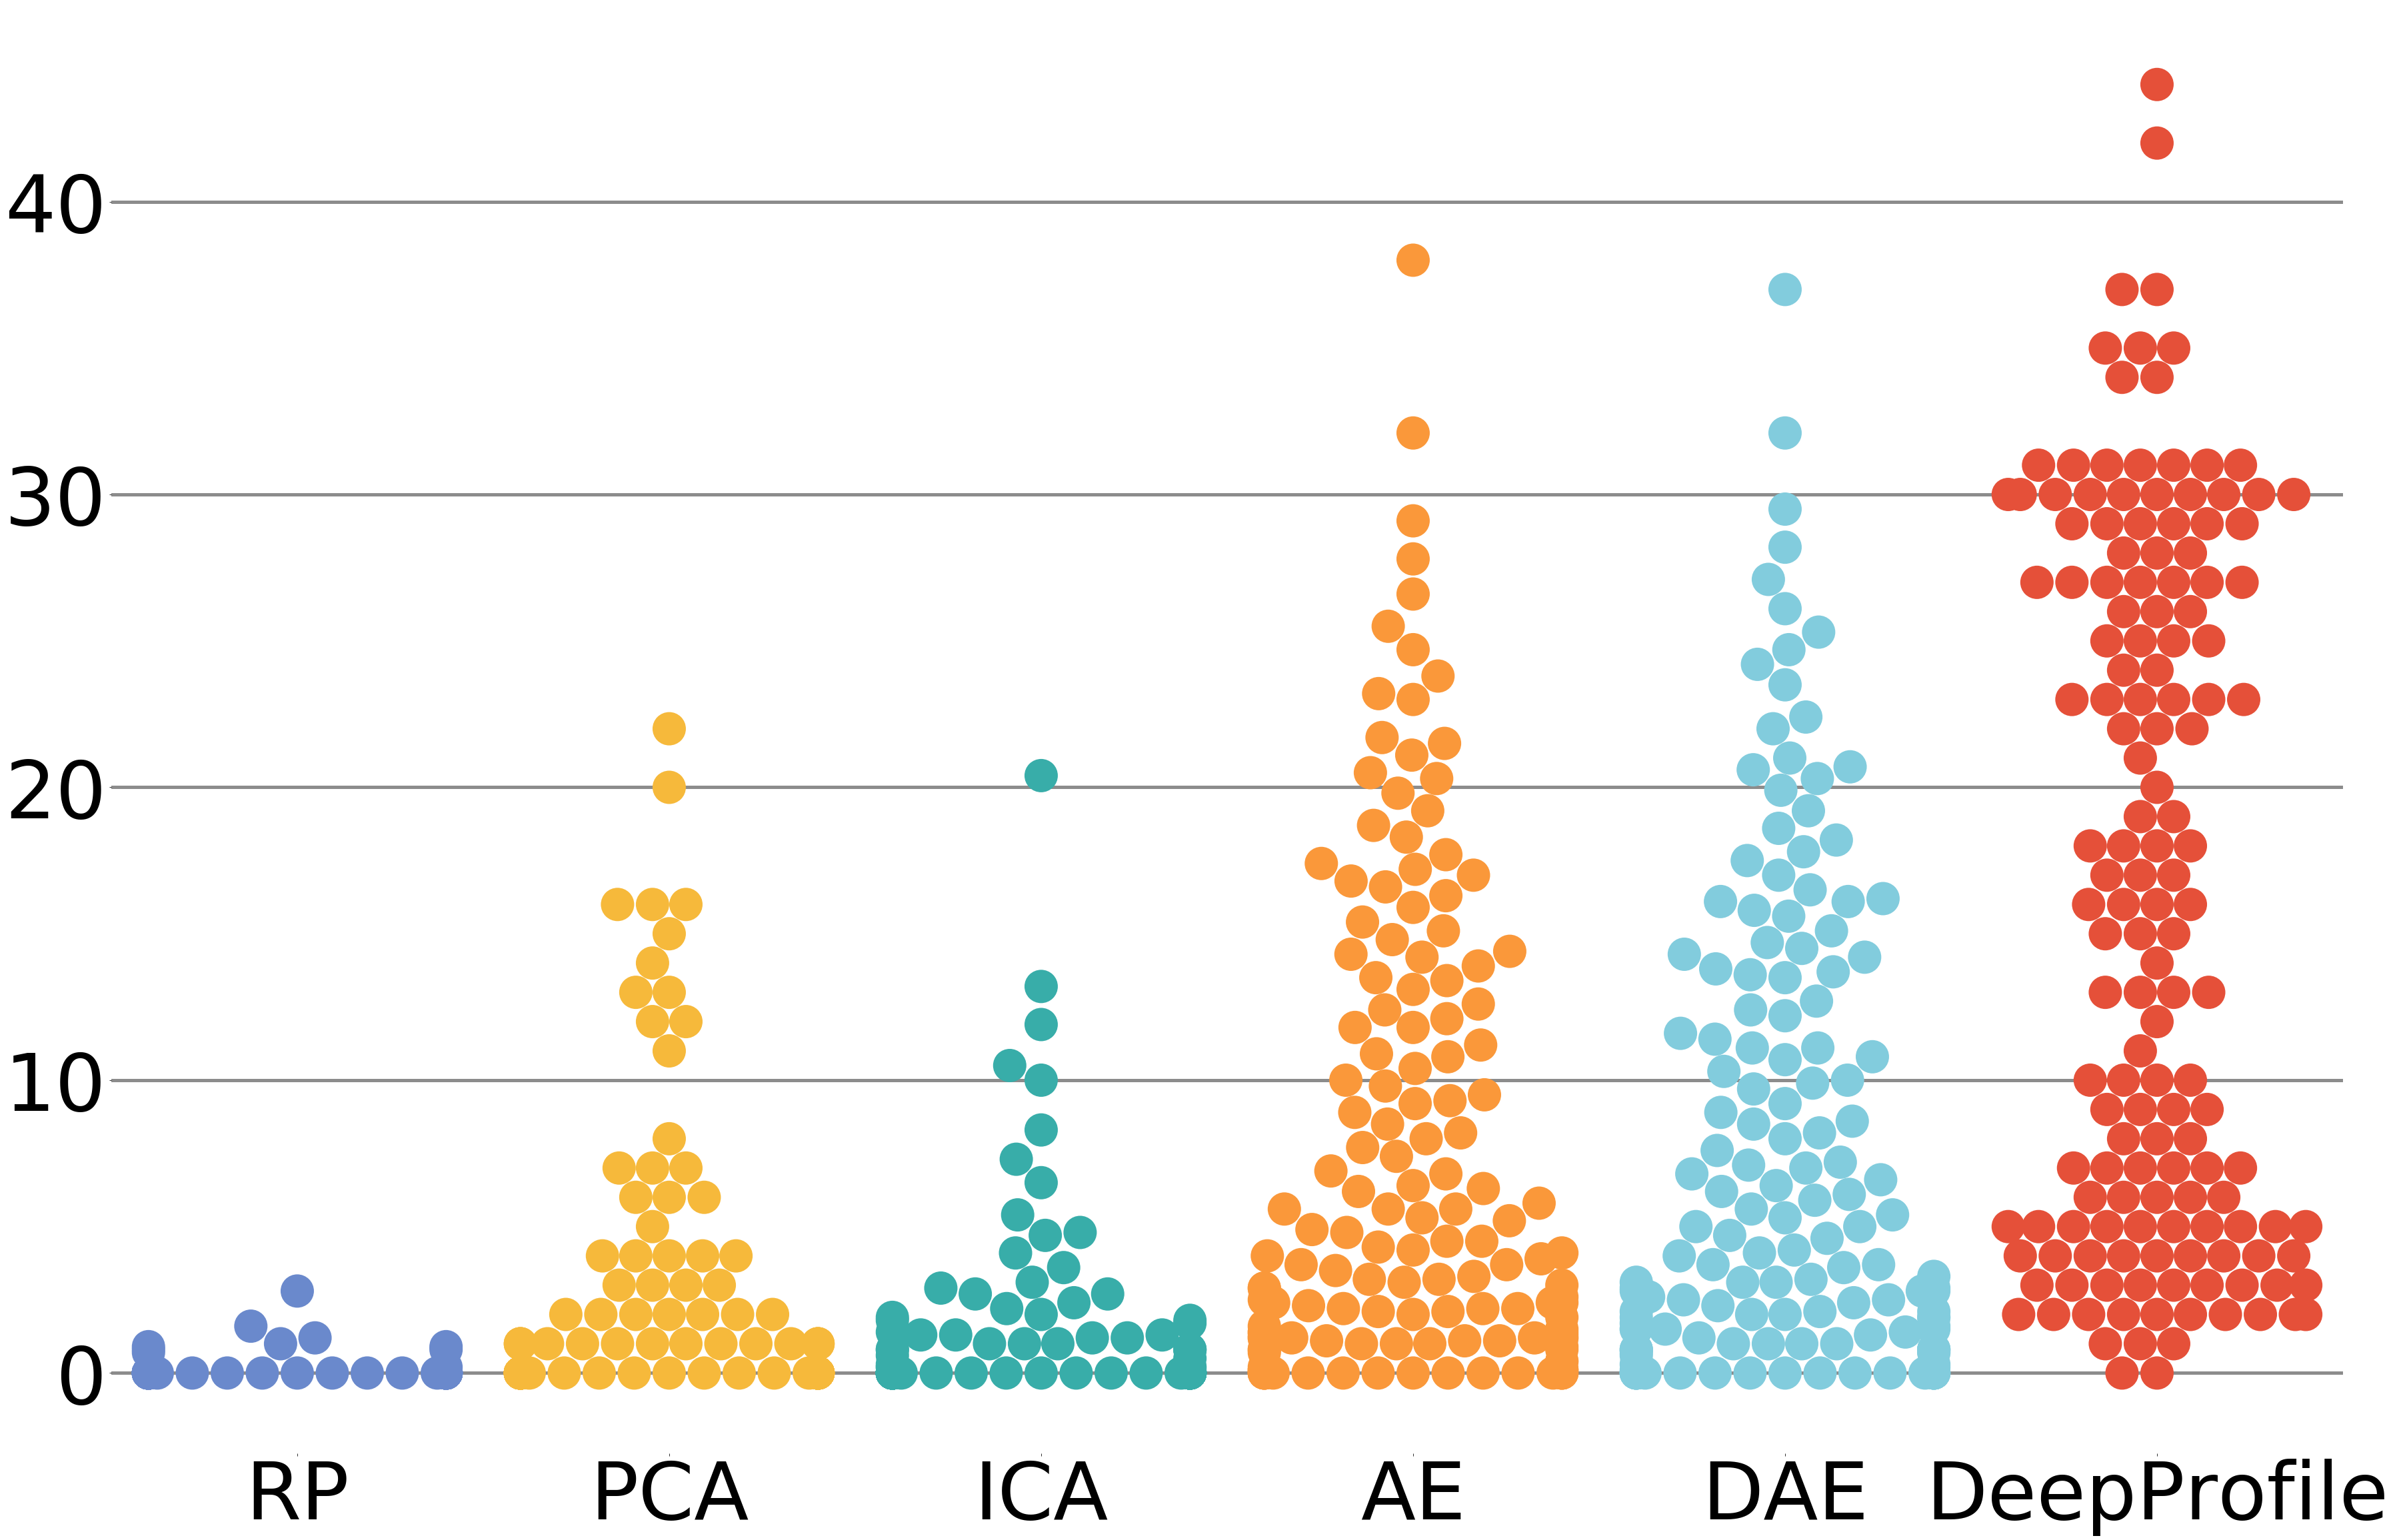

STOMACH
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-v

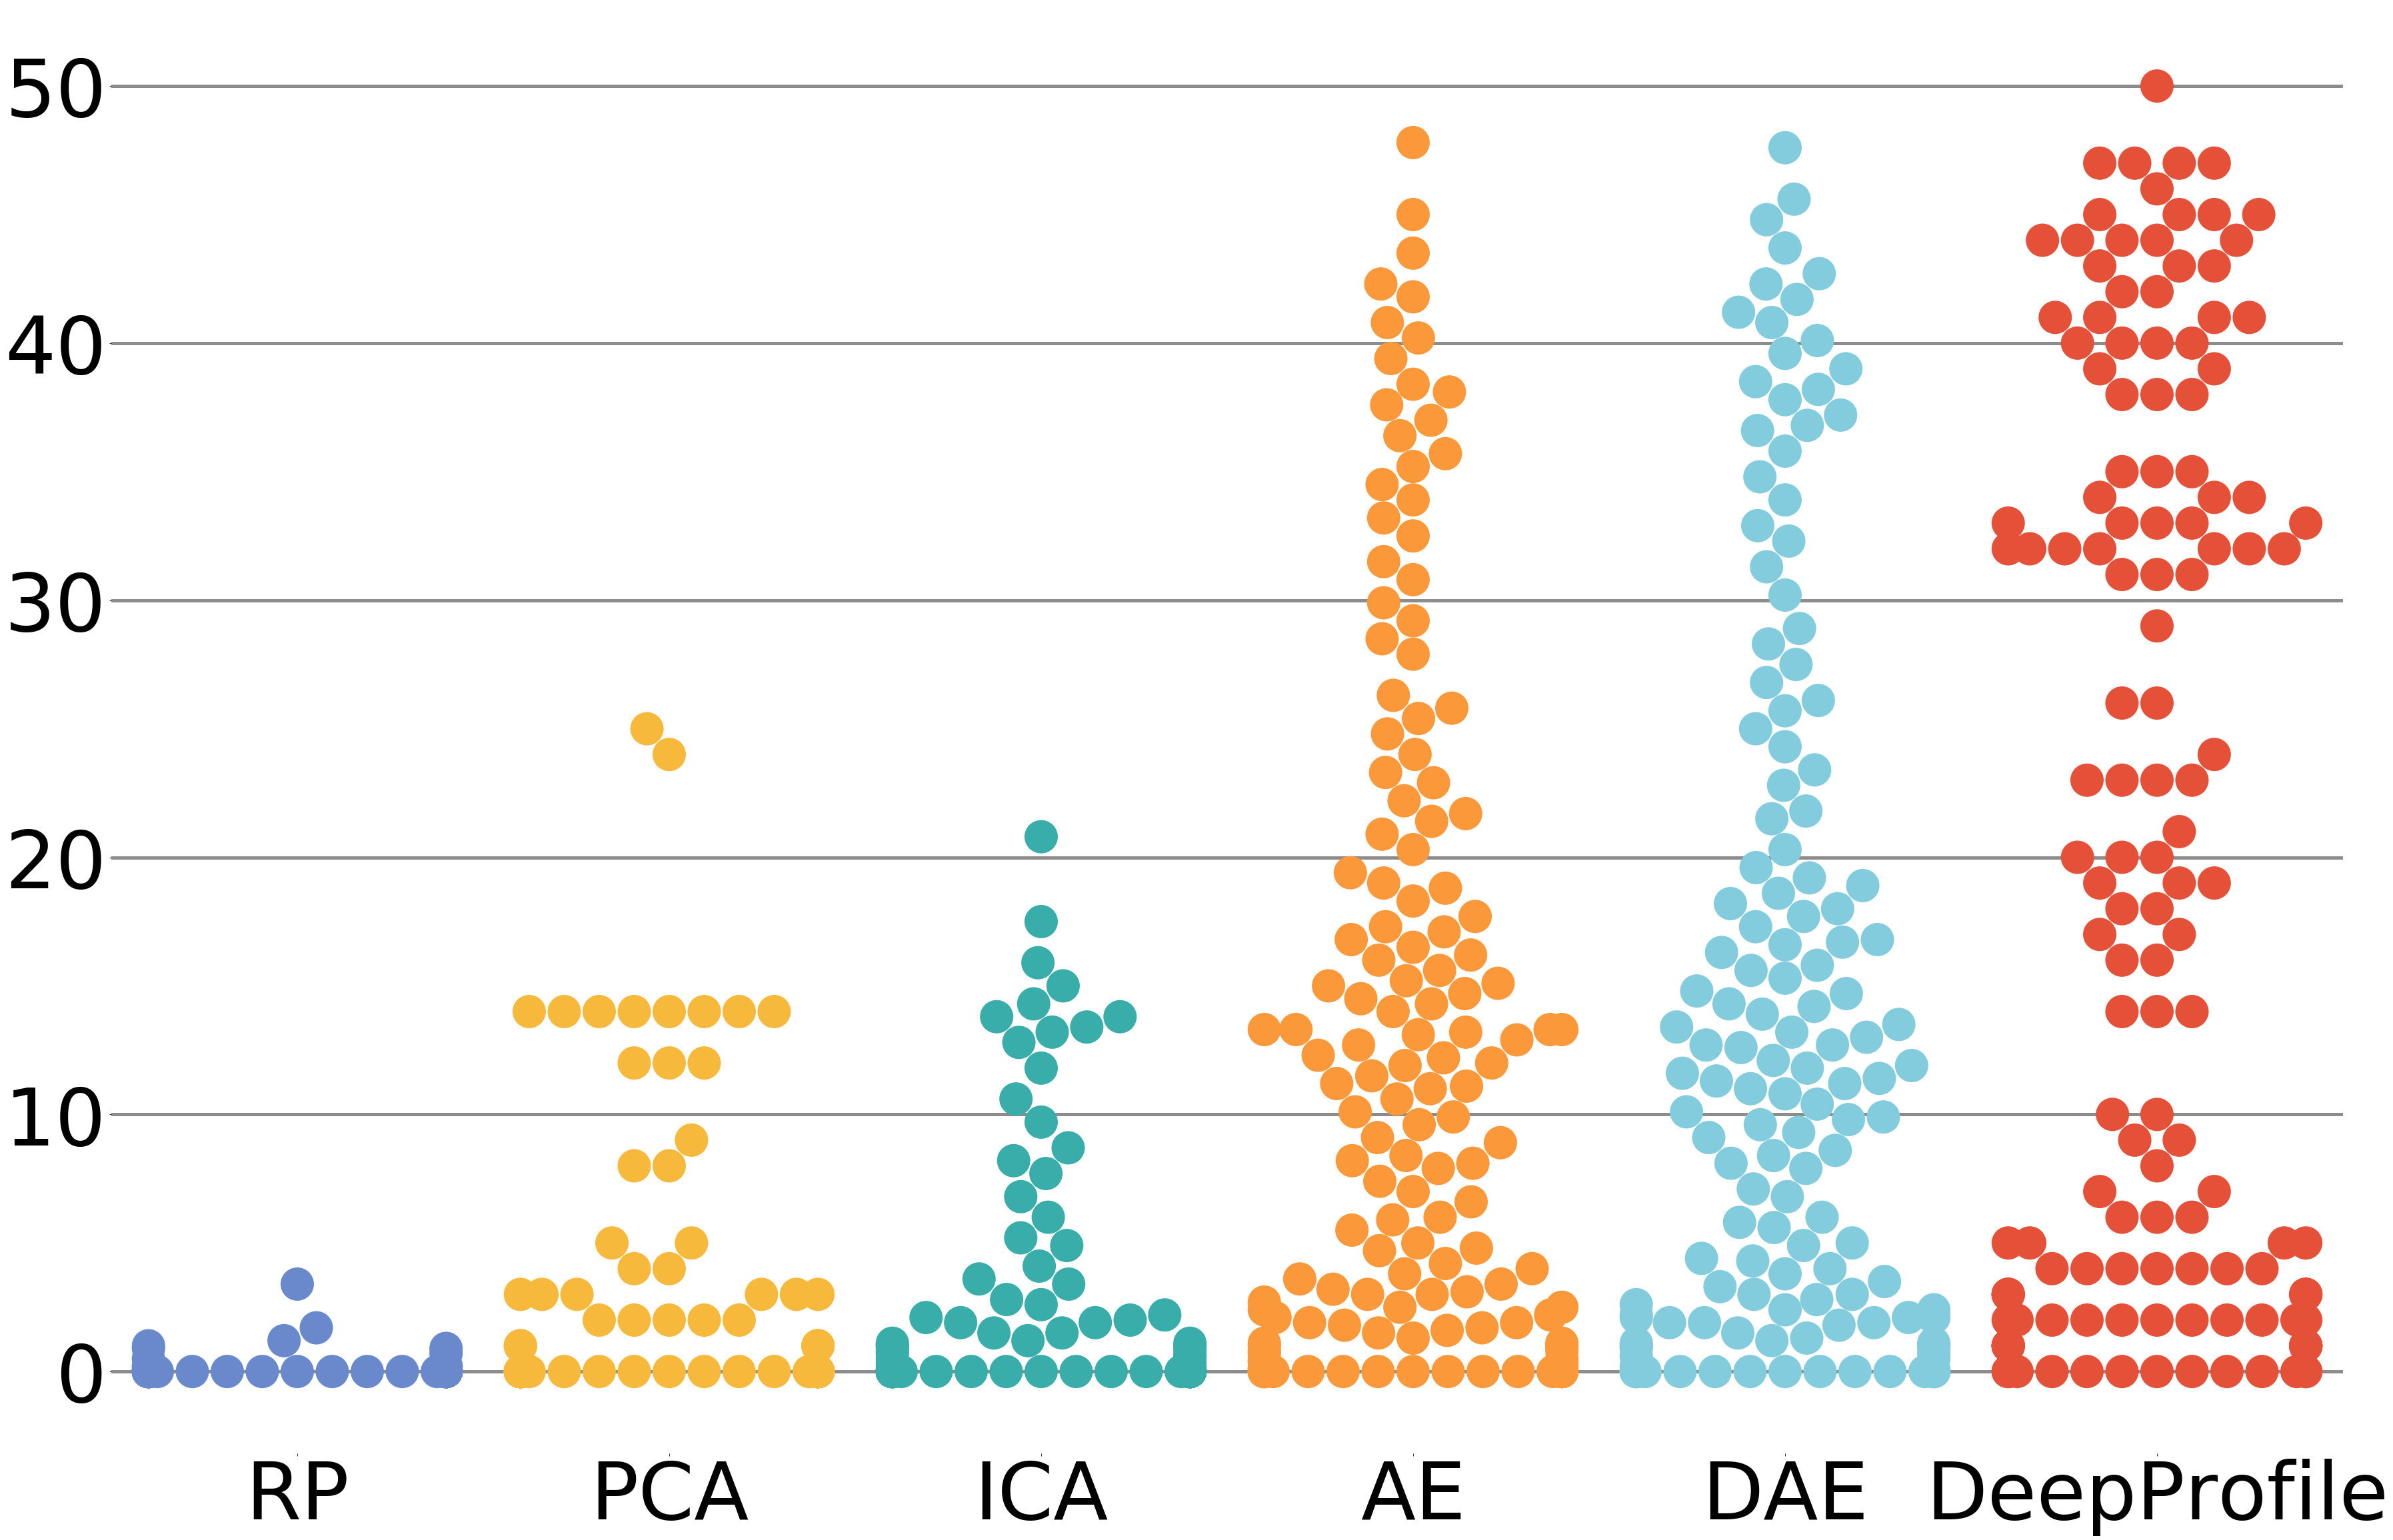

SKIN
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-valu

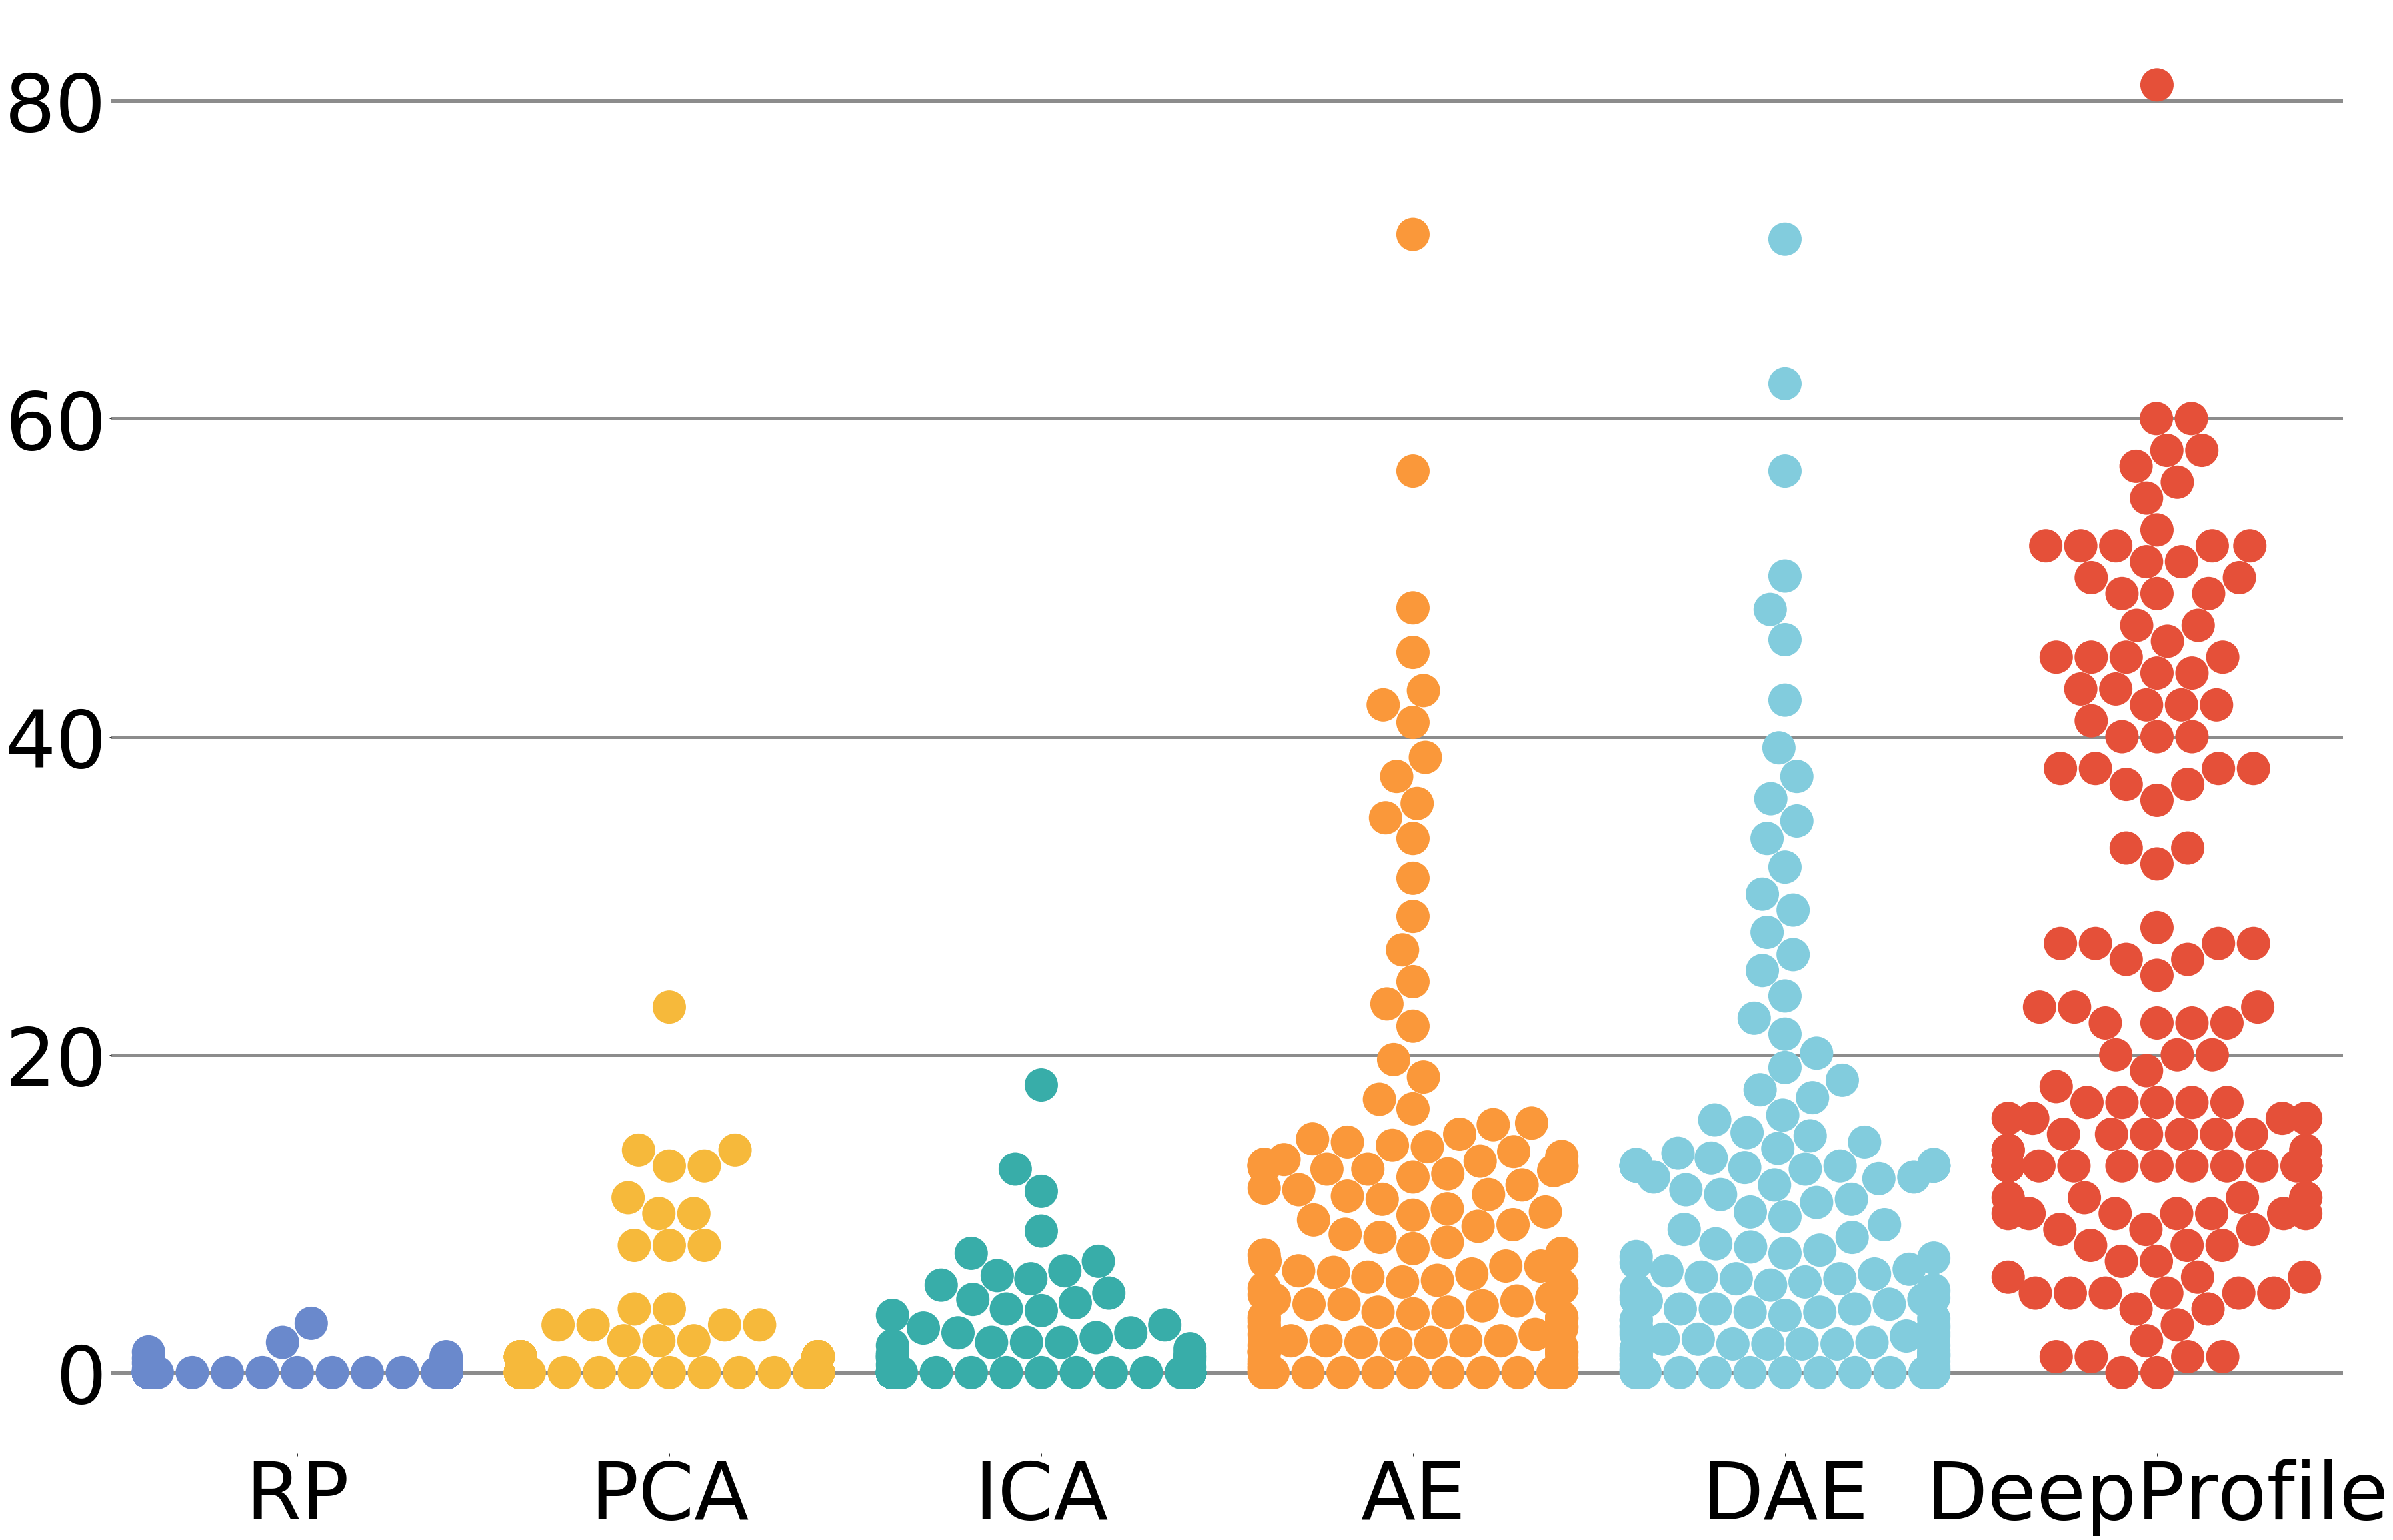

PROSTATE
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-

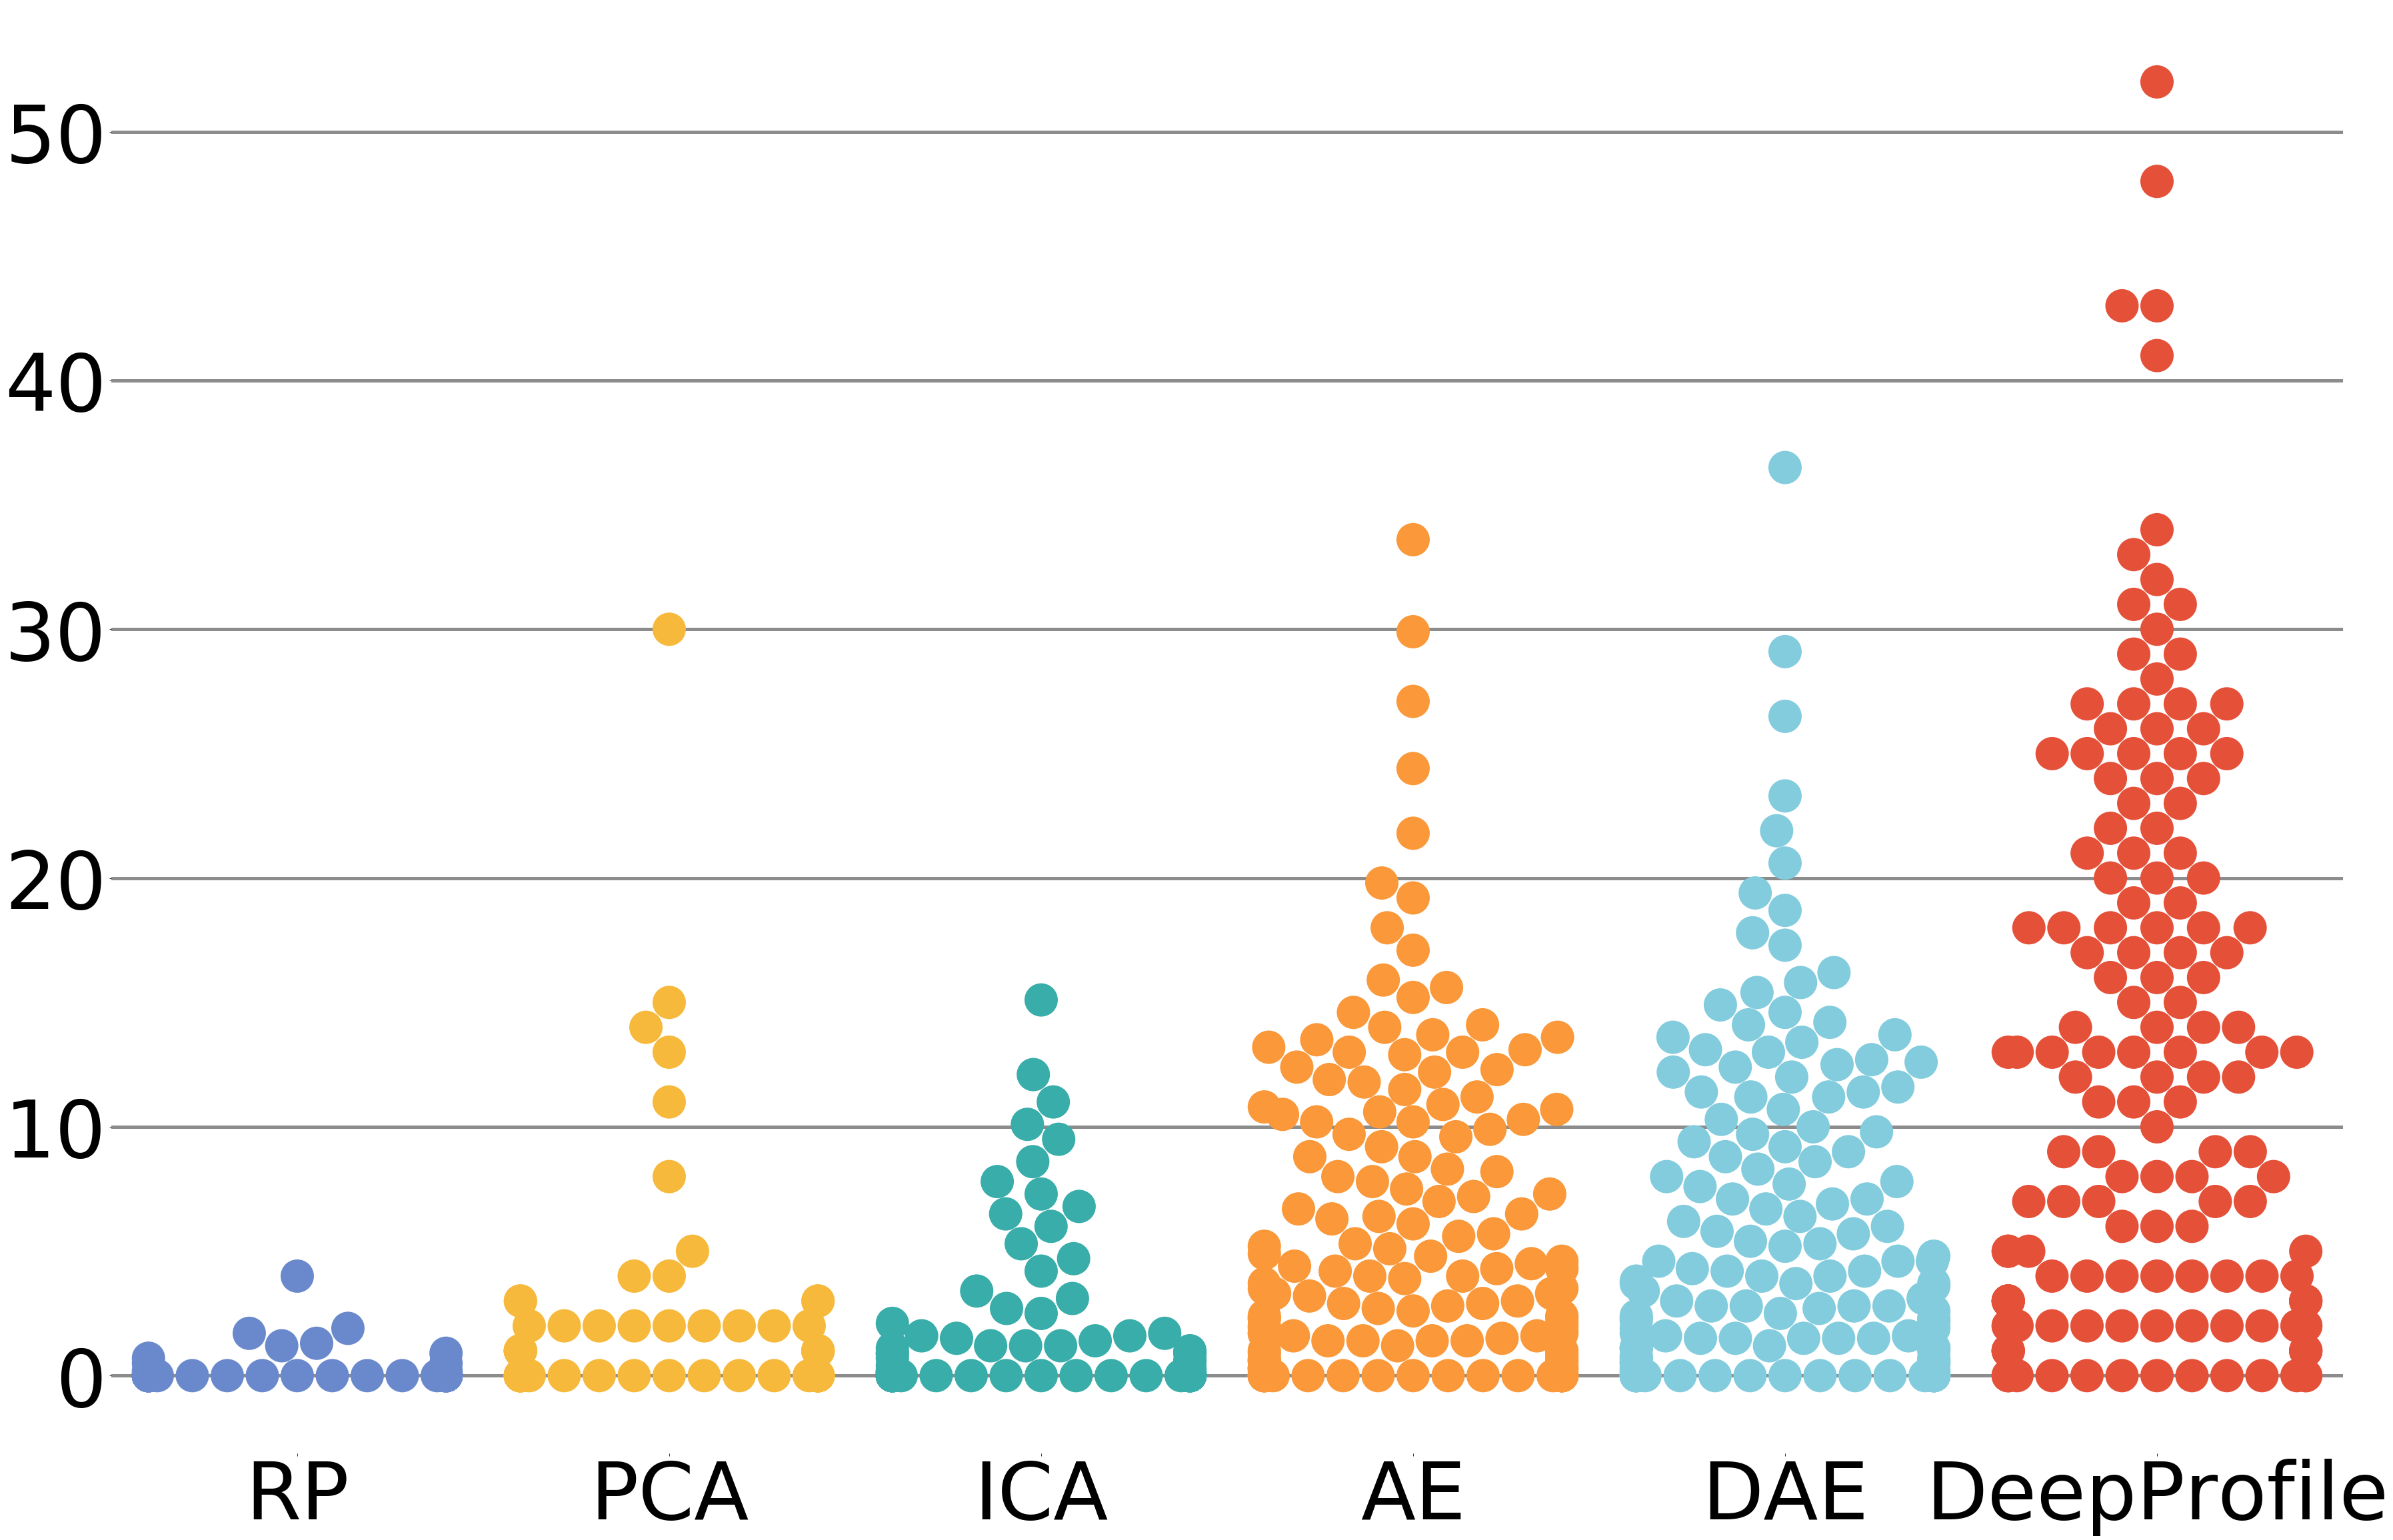

THYROID
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-v

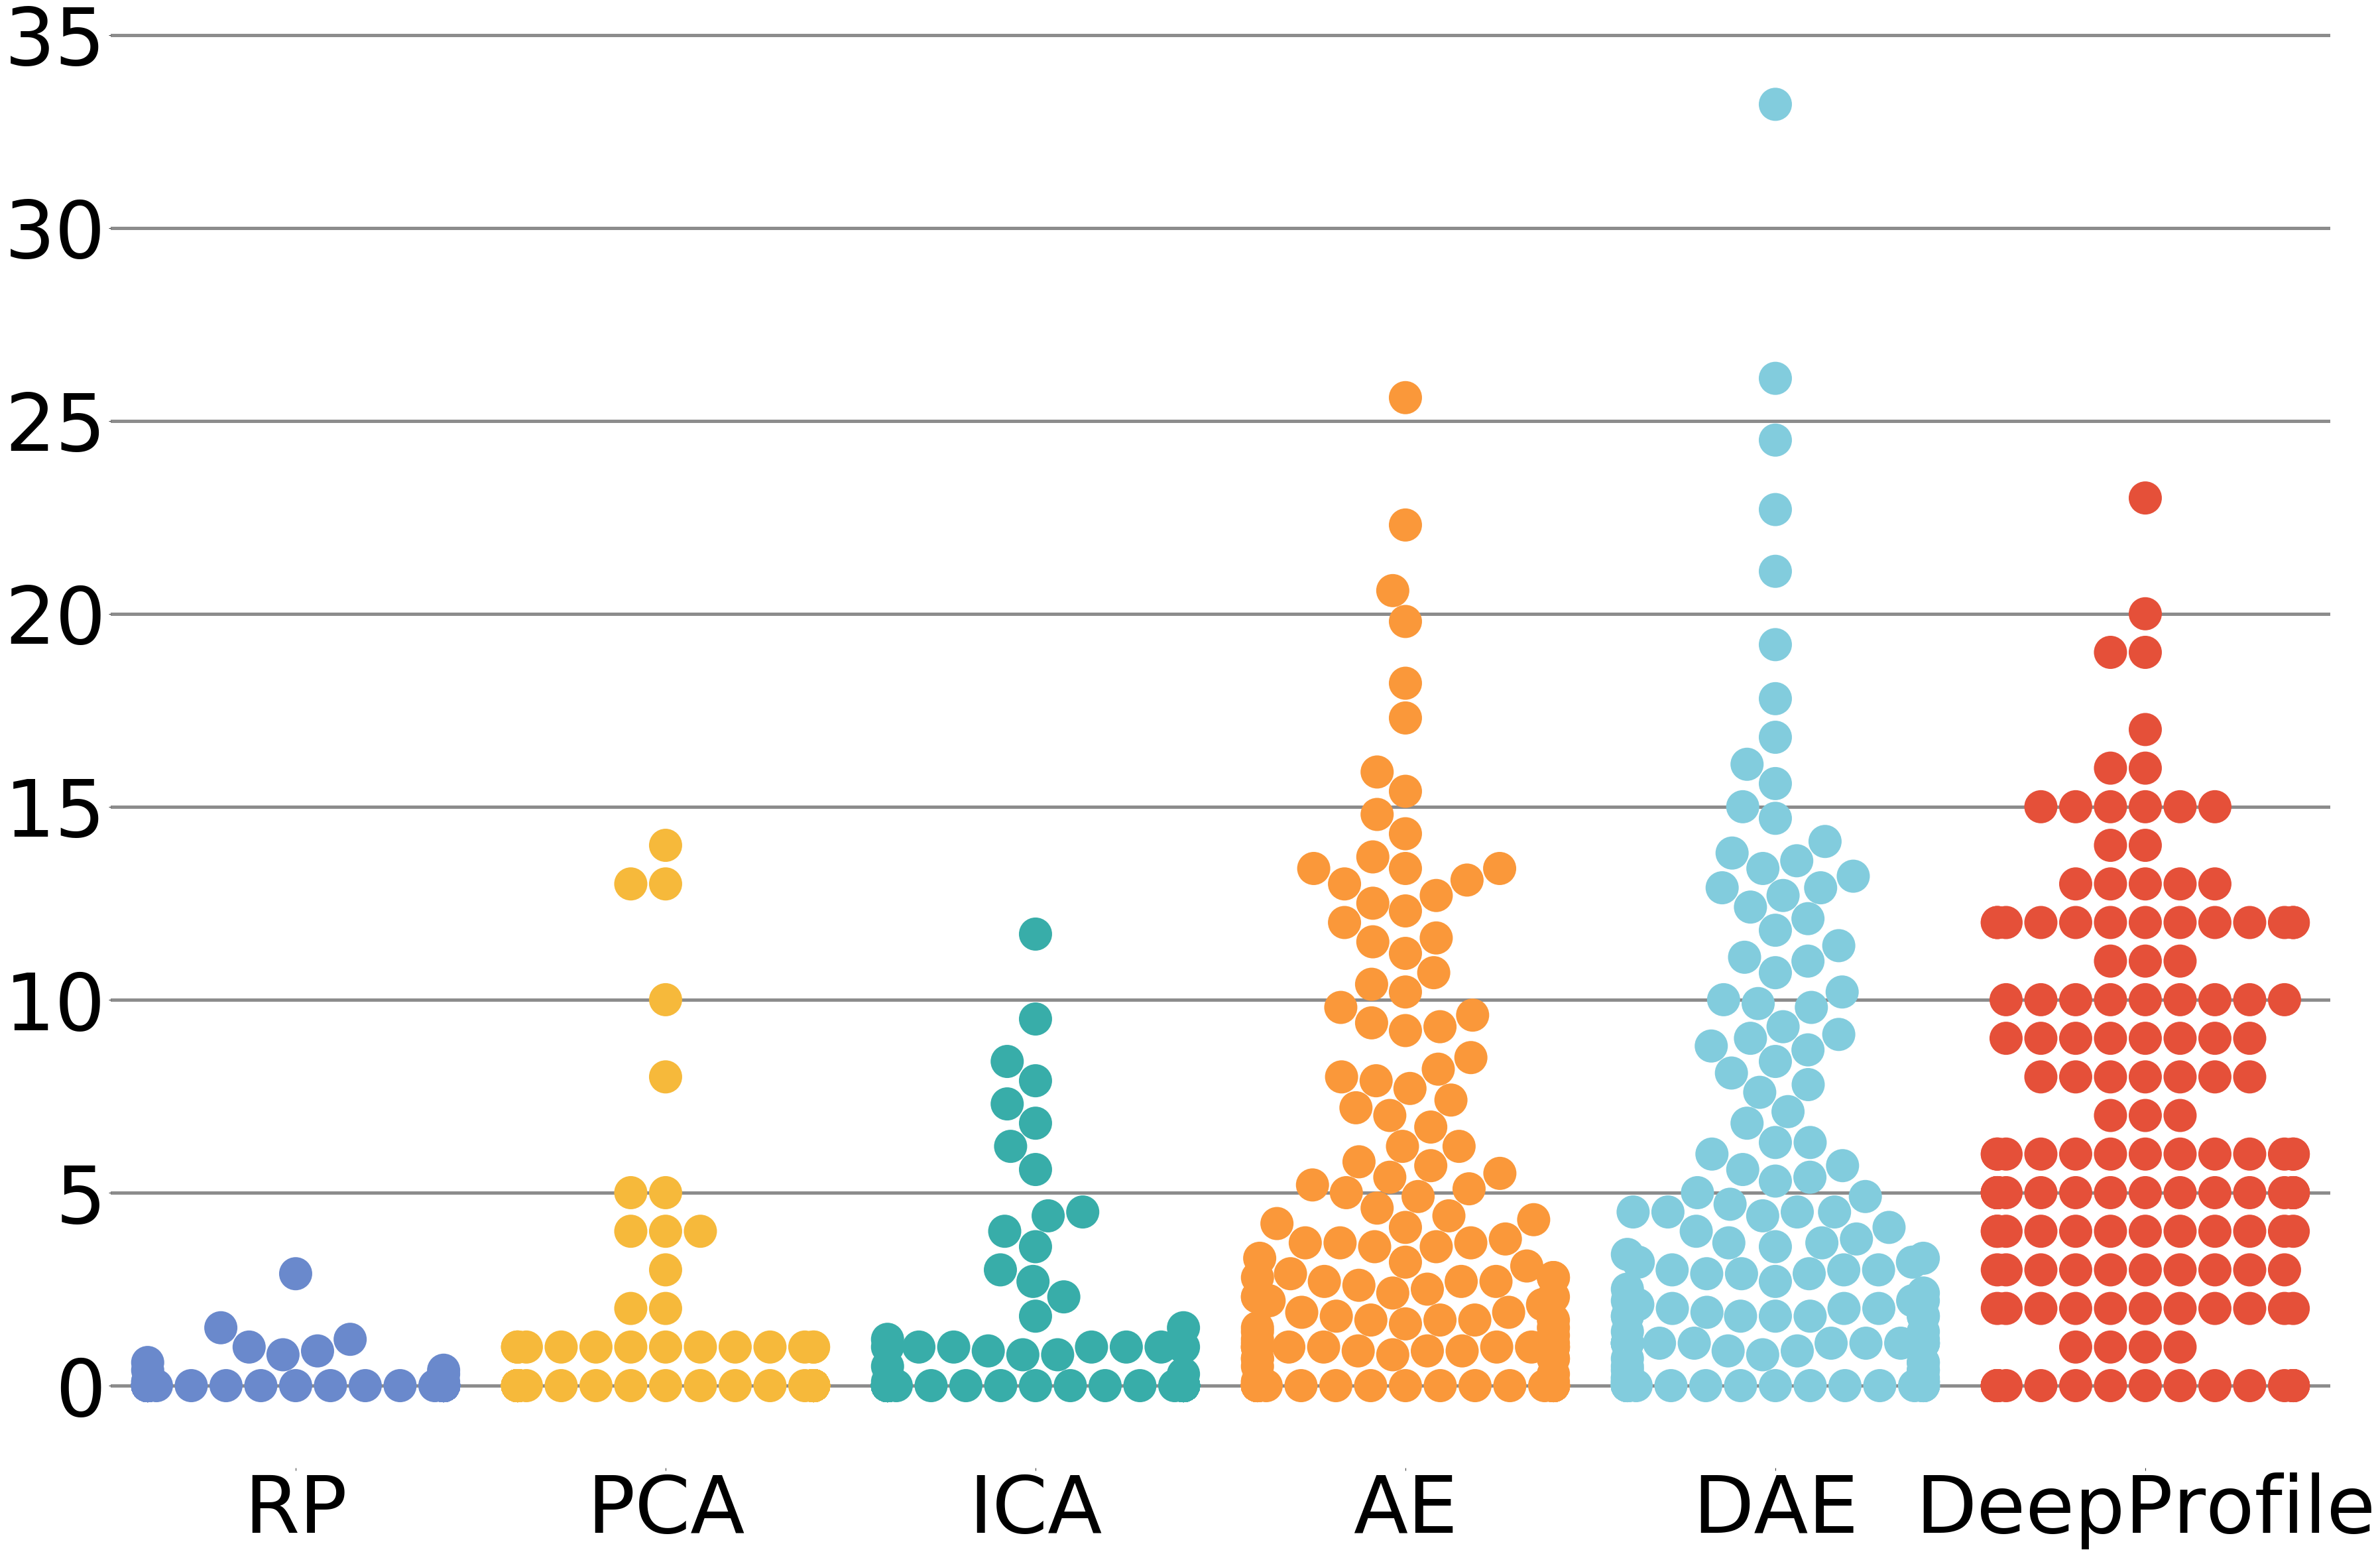

UTERINE
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-v

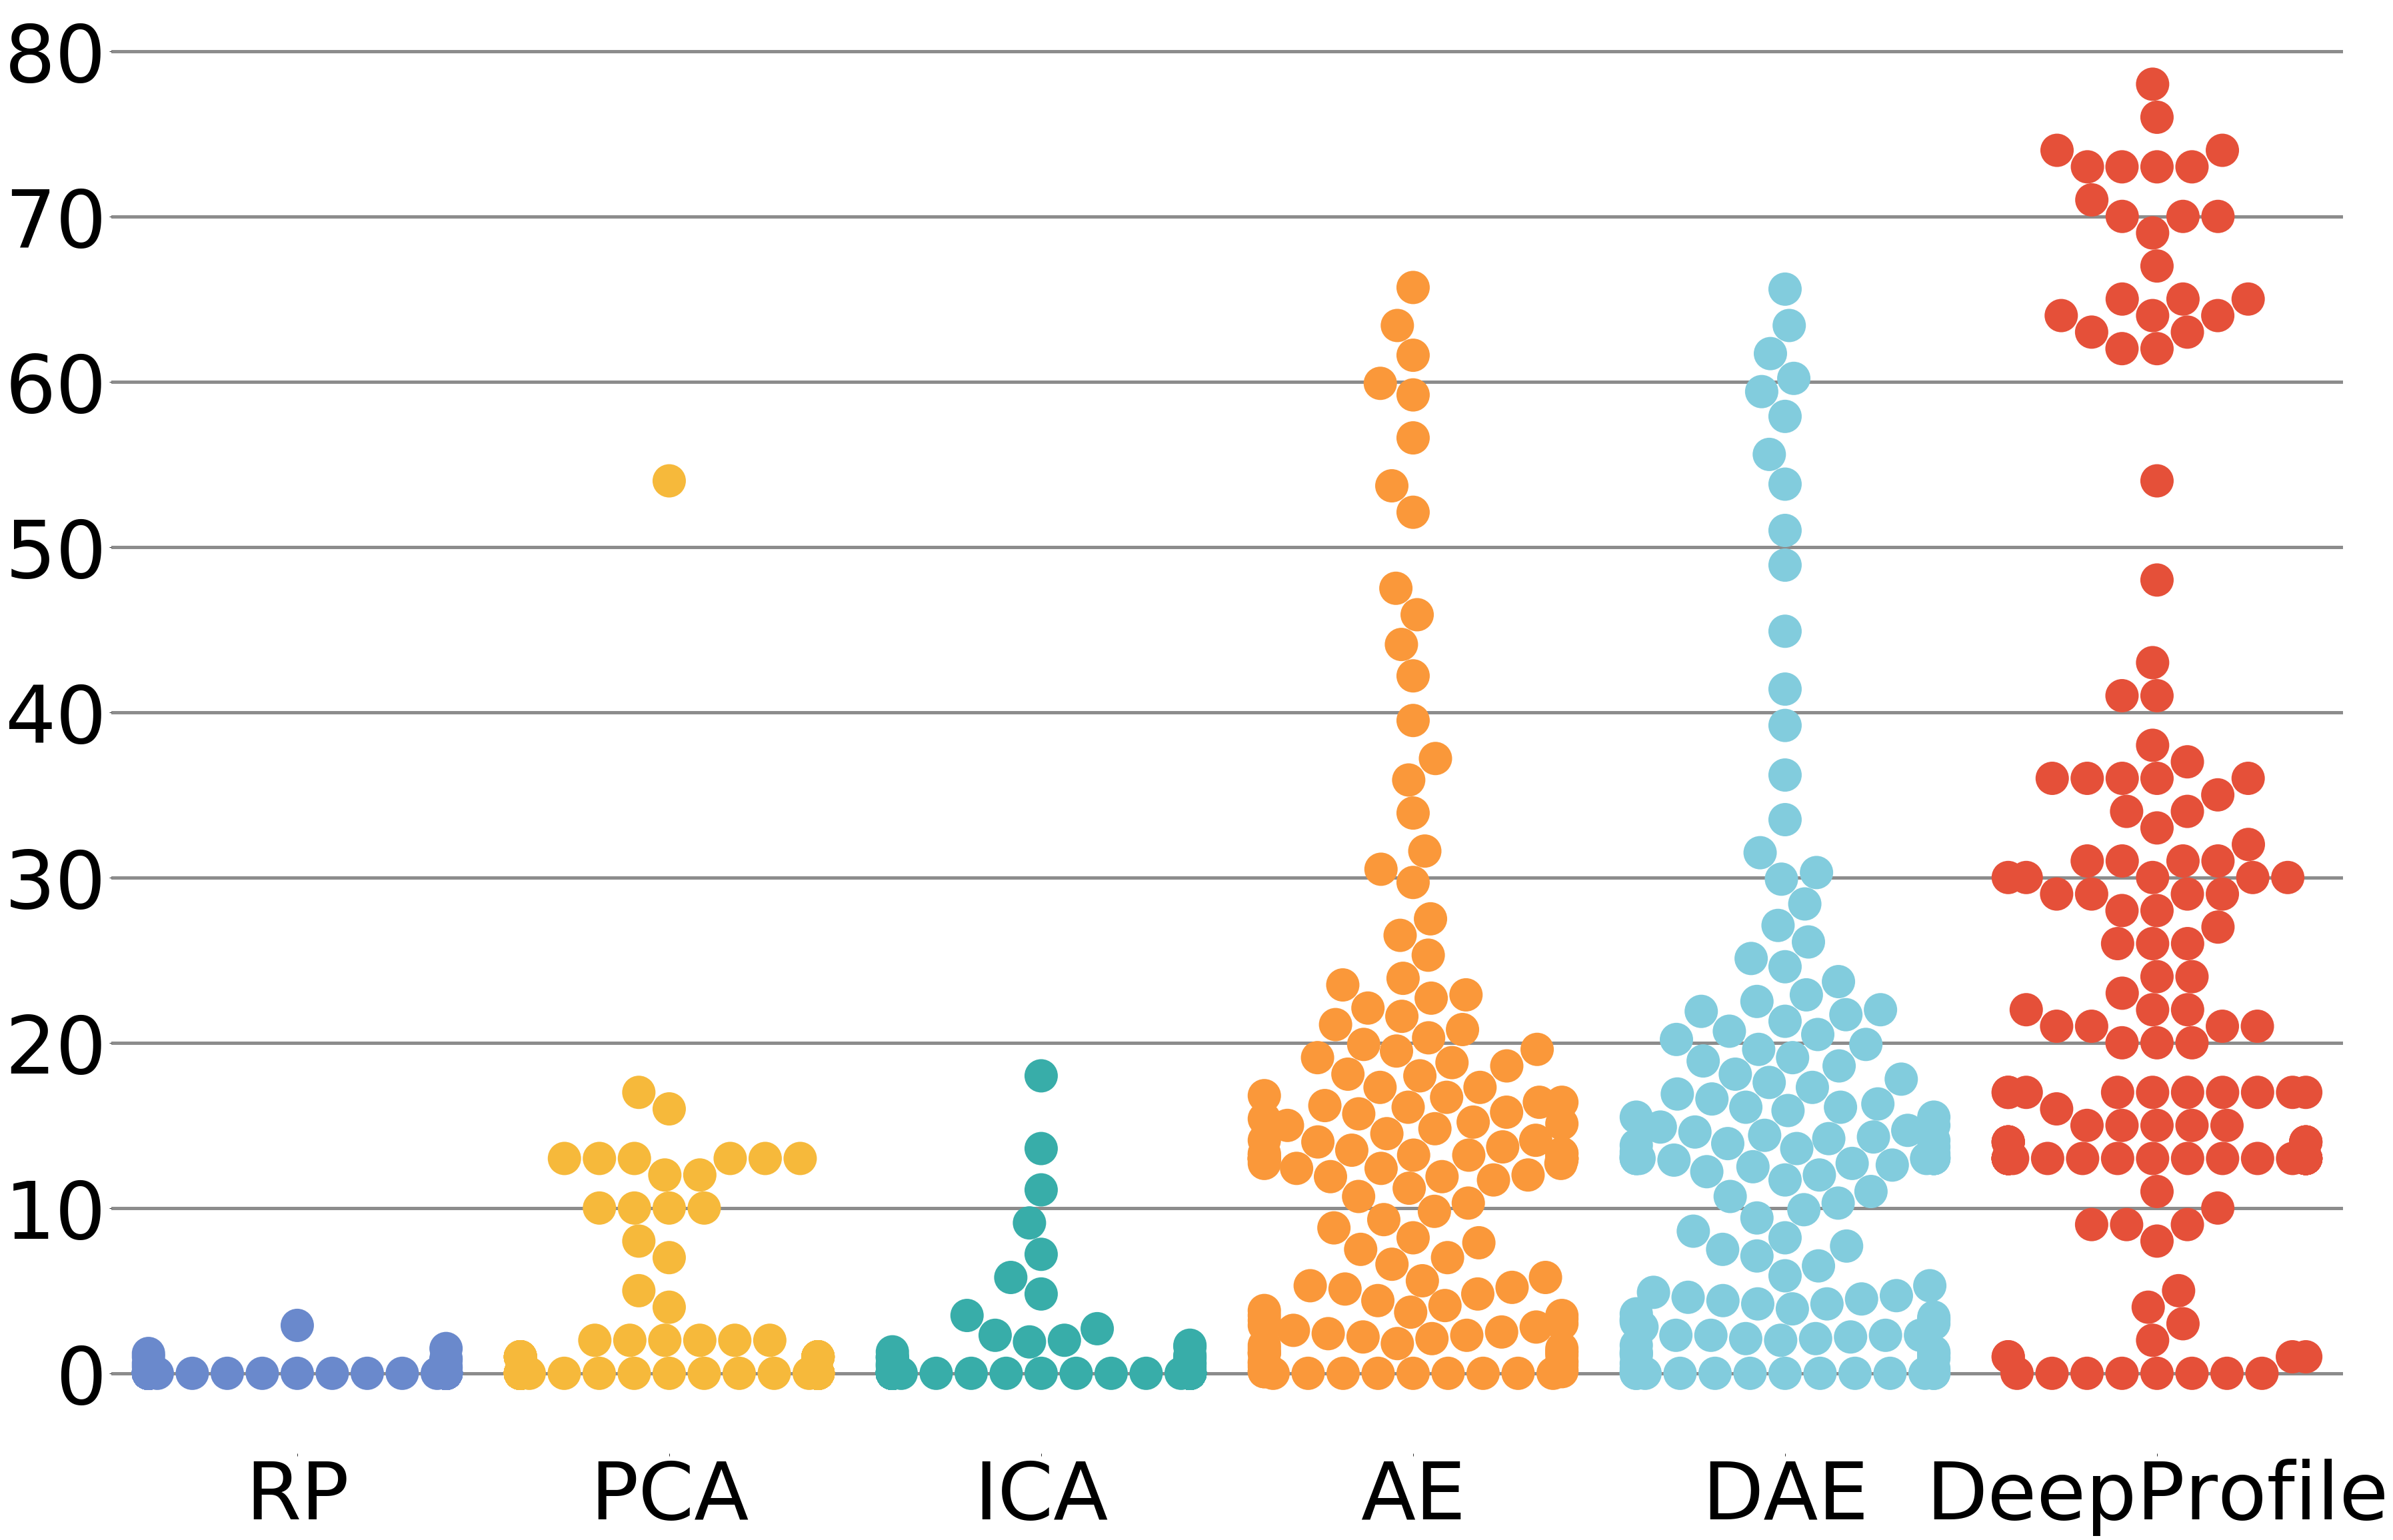

HEAD_NECK
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P

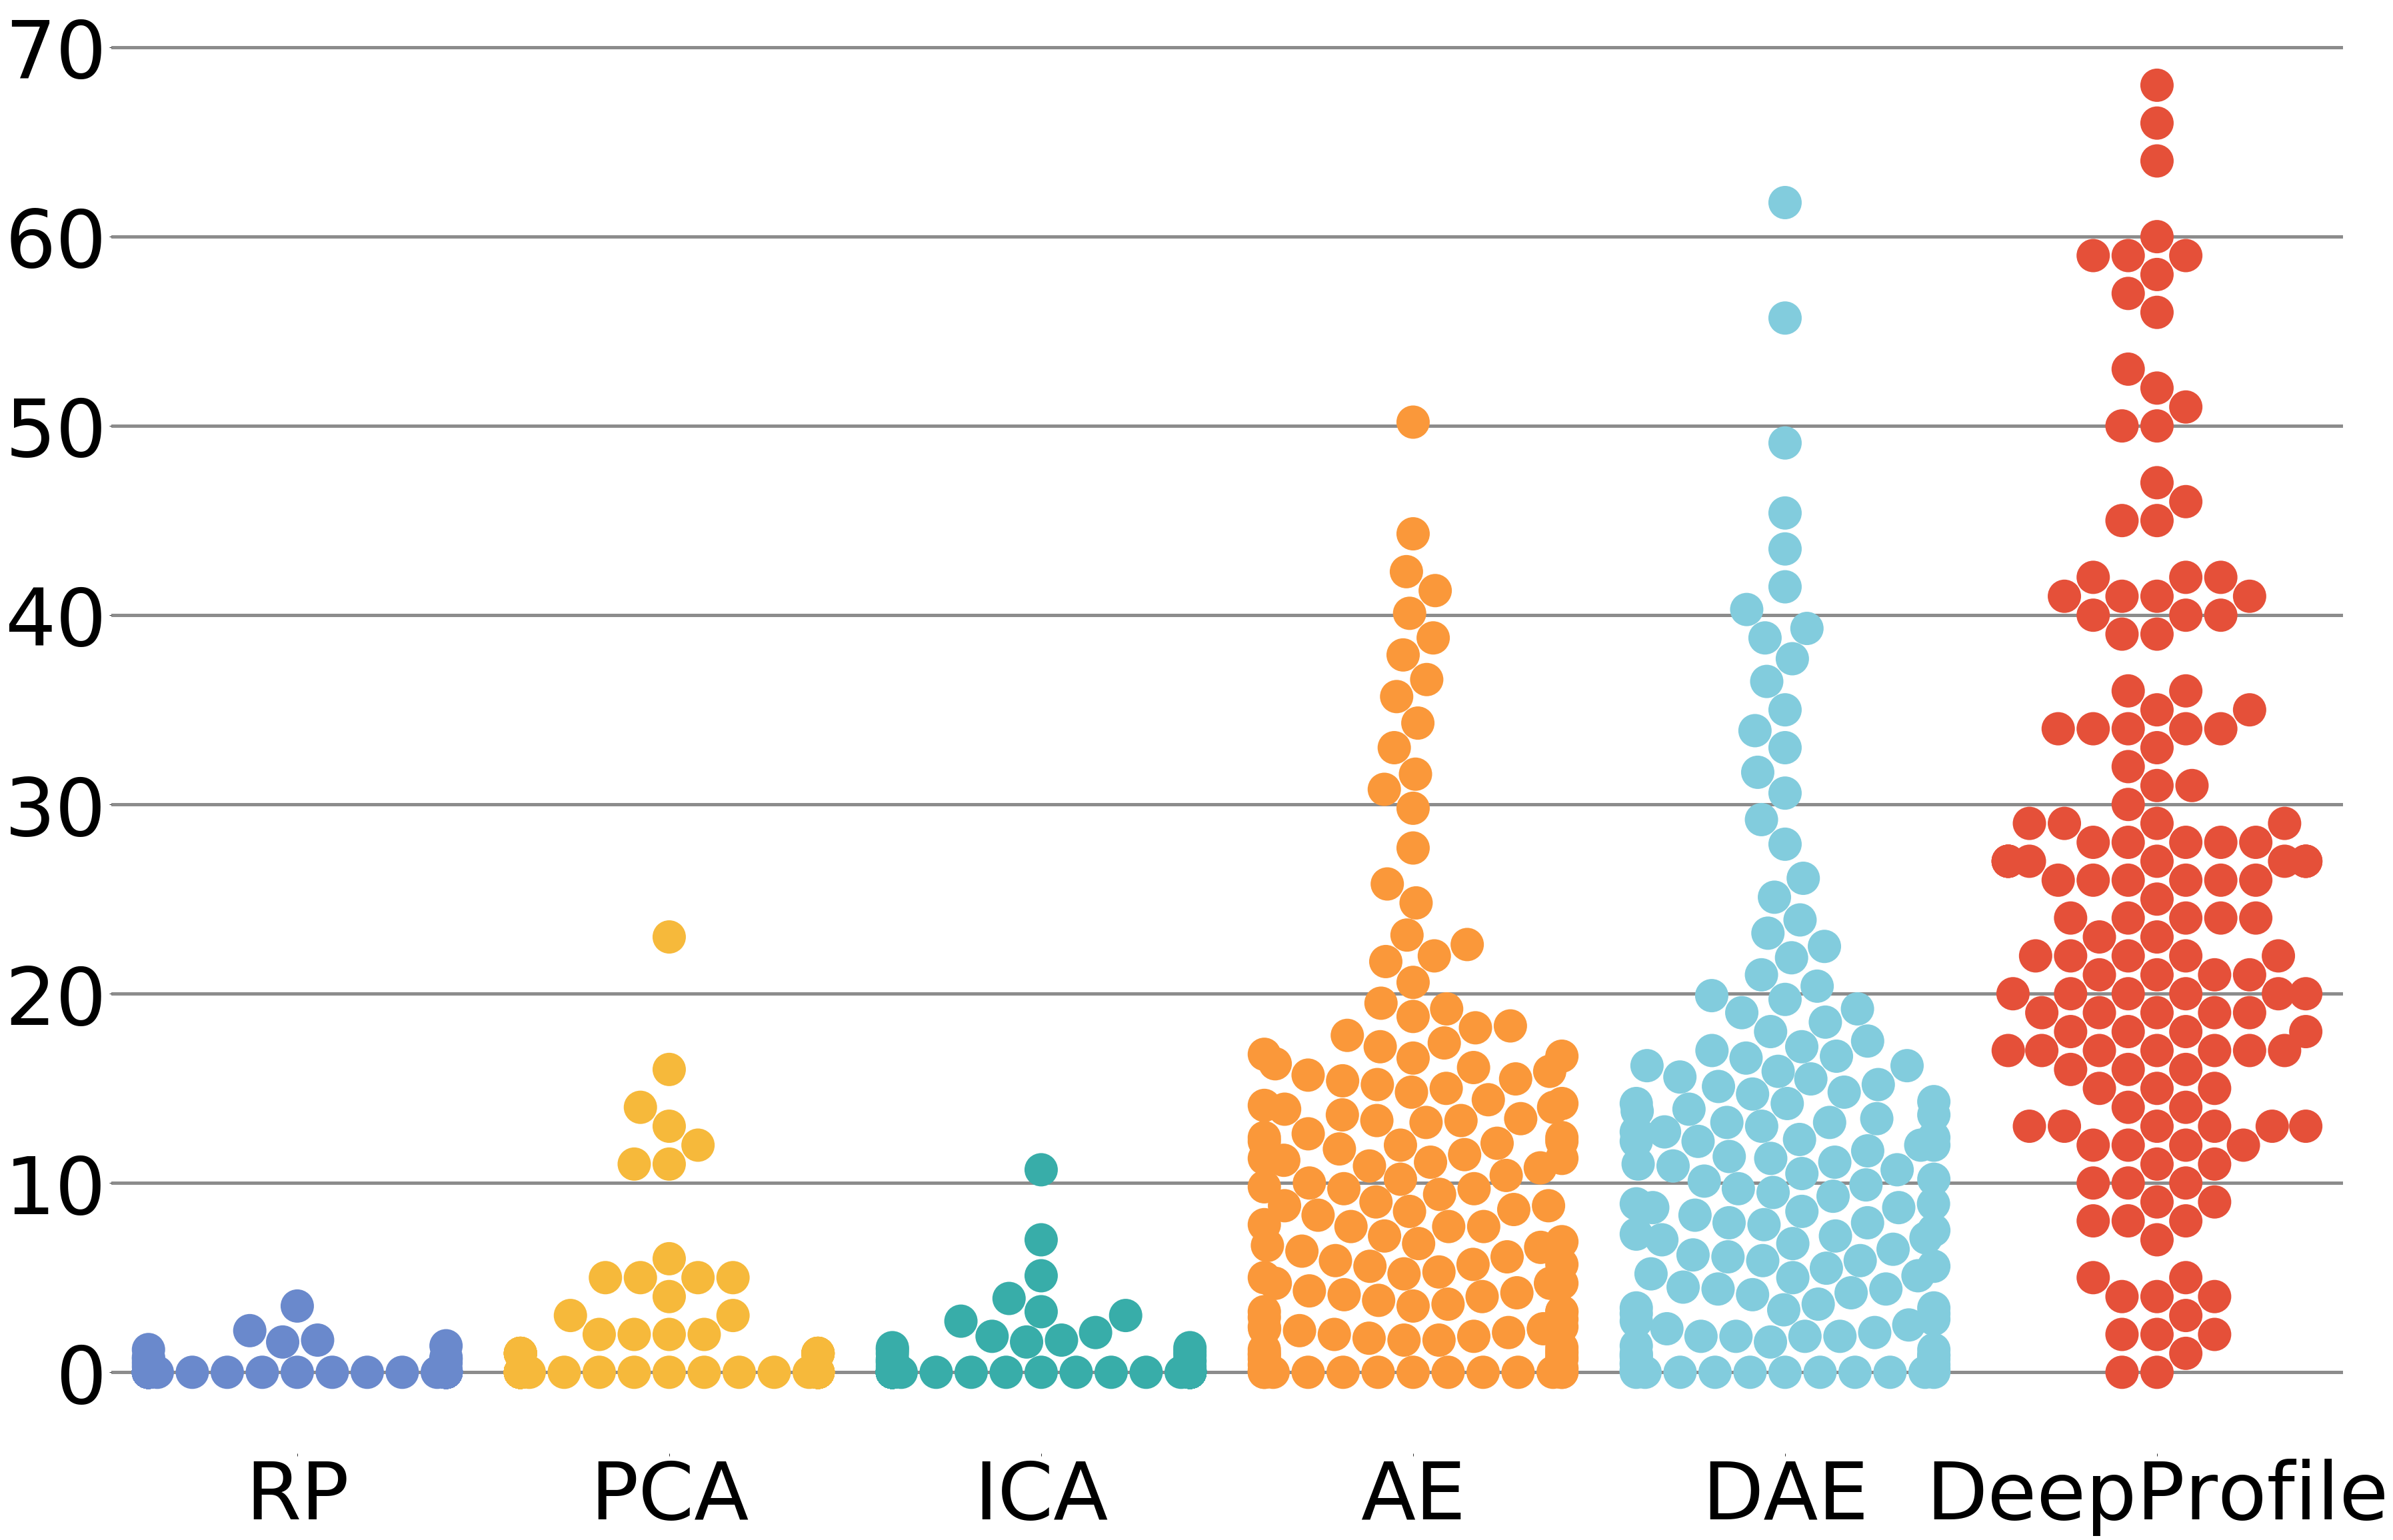

PANCREAS
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-

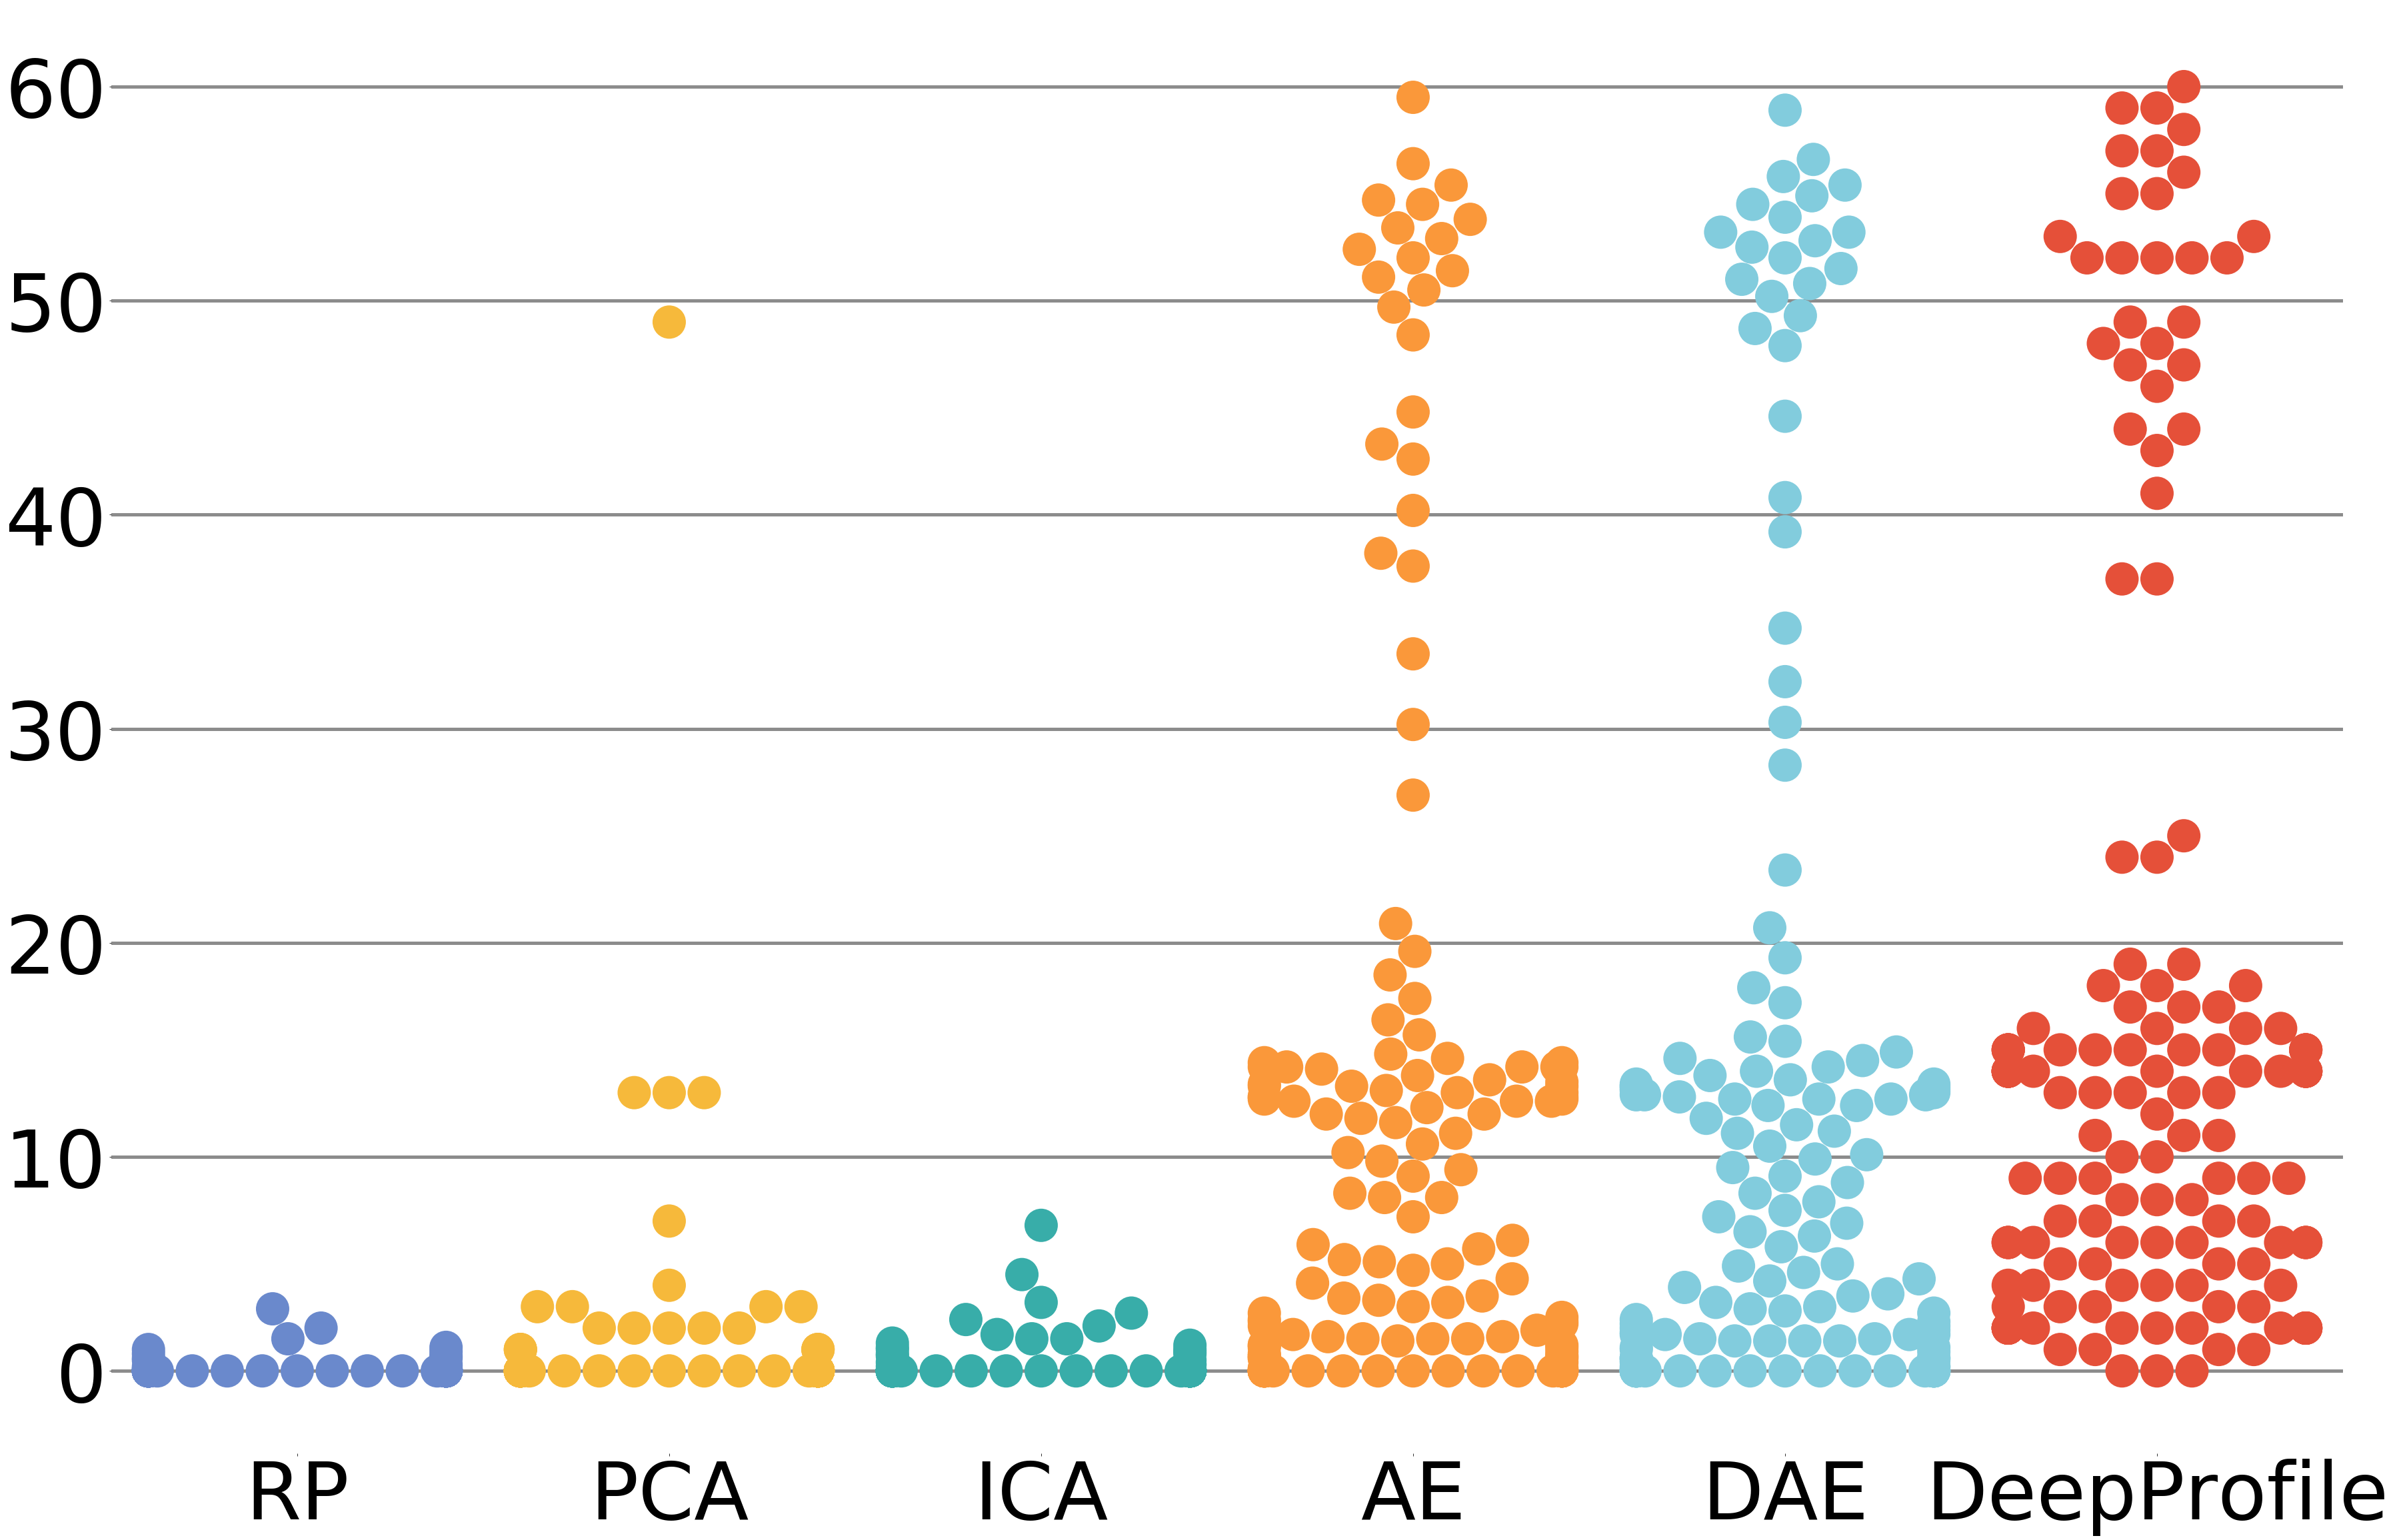

CERVICAL
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-

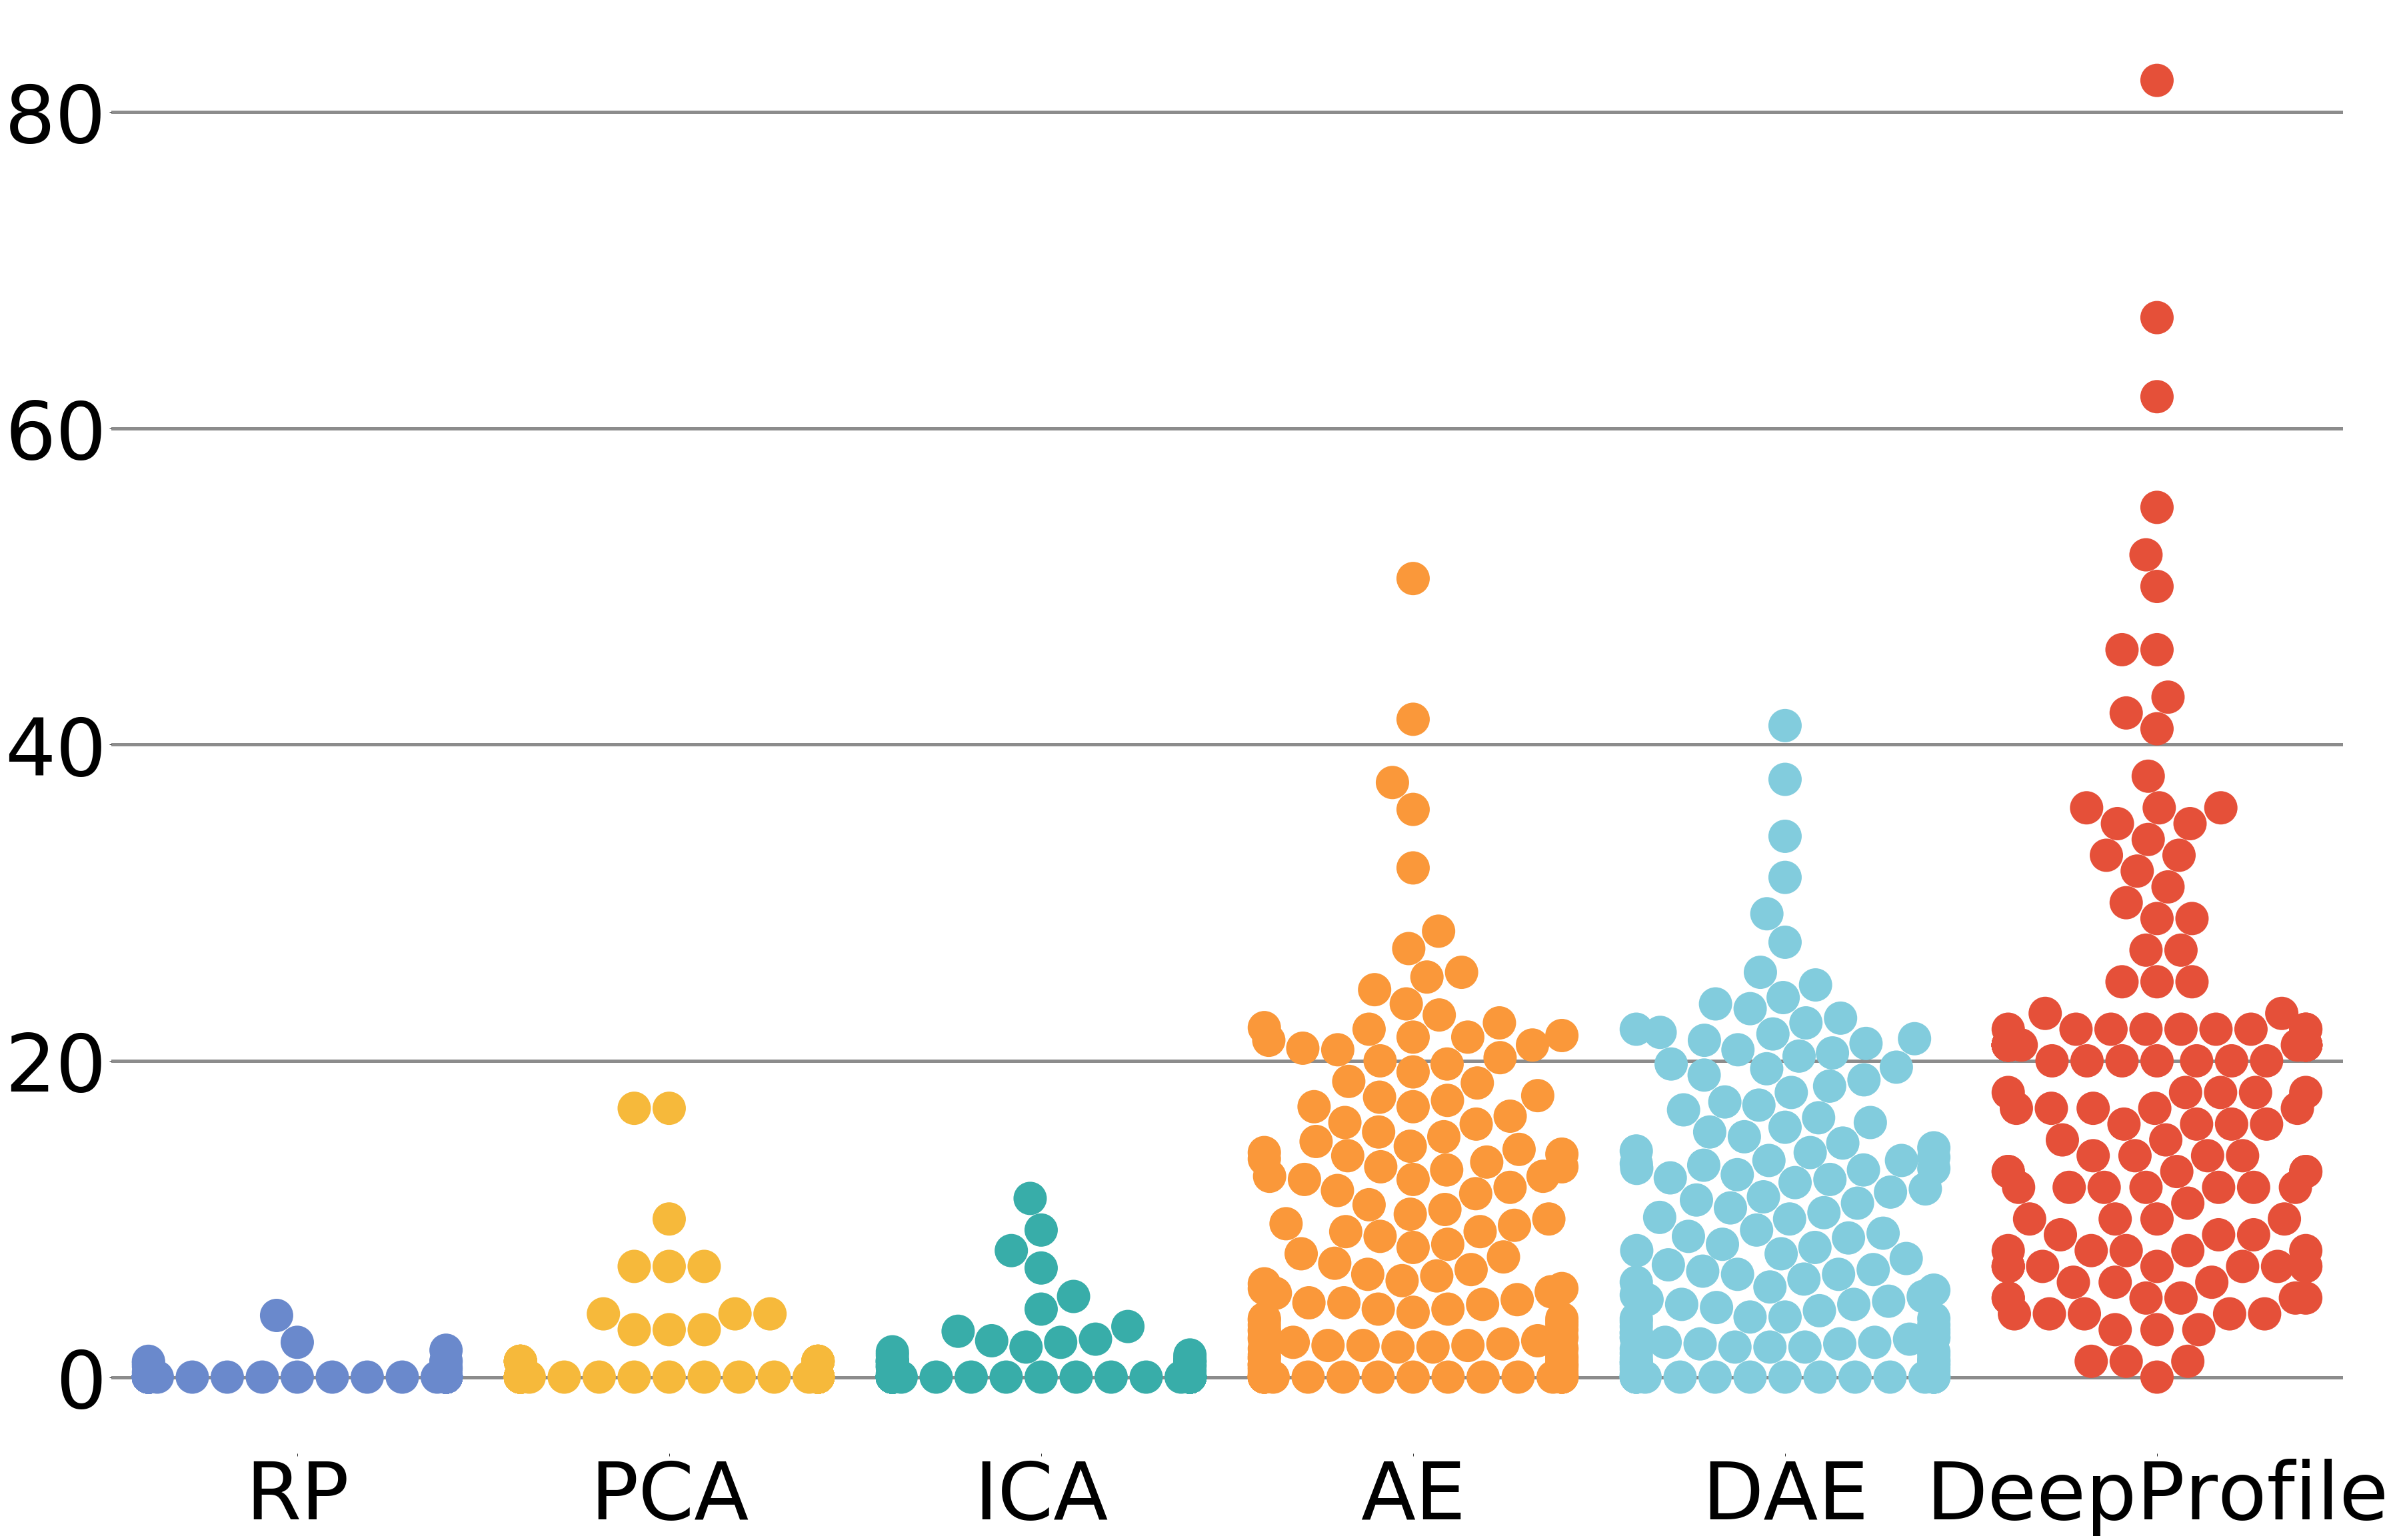

BLADDER
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-values dataframe  (150, 1077)
7
P-values dataframe  (150, 1077)
8
P-values dataframe  (150, 1077)
9
P-values dataframe  (150, 1077)
-1
P-values dataframe  (150, 1077)
0
P-values dataframe  (150, 1077)
1
P-values dataframe  (150, 1077)
2
P-values dataframe  (150, 1077)
3
P-values dataframe  (150, 1077)
4
P-values dataframe  (150, 1077)
5
P-values dataframe  (150, 1077)
6
P-v

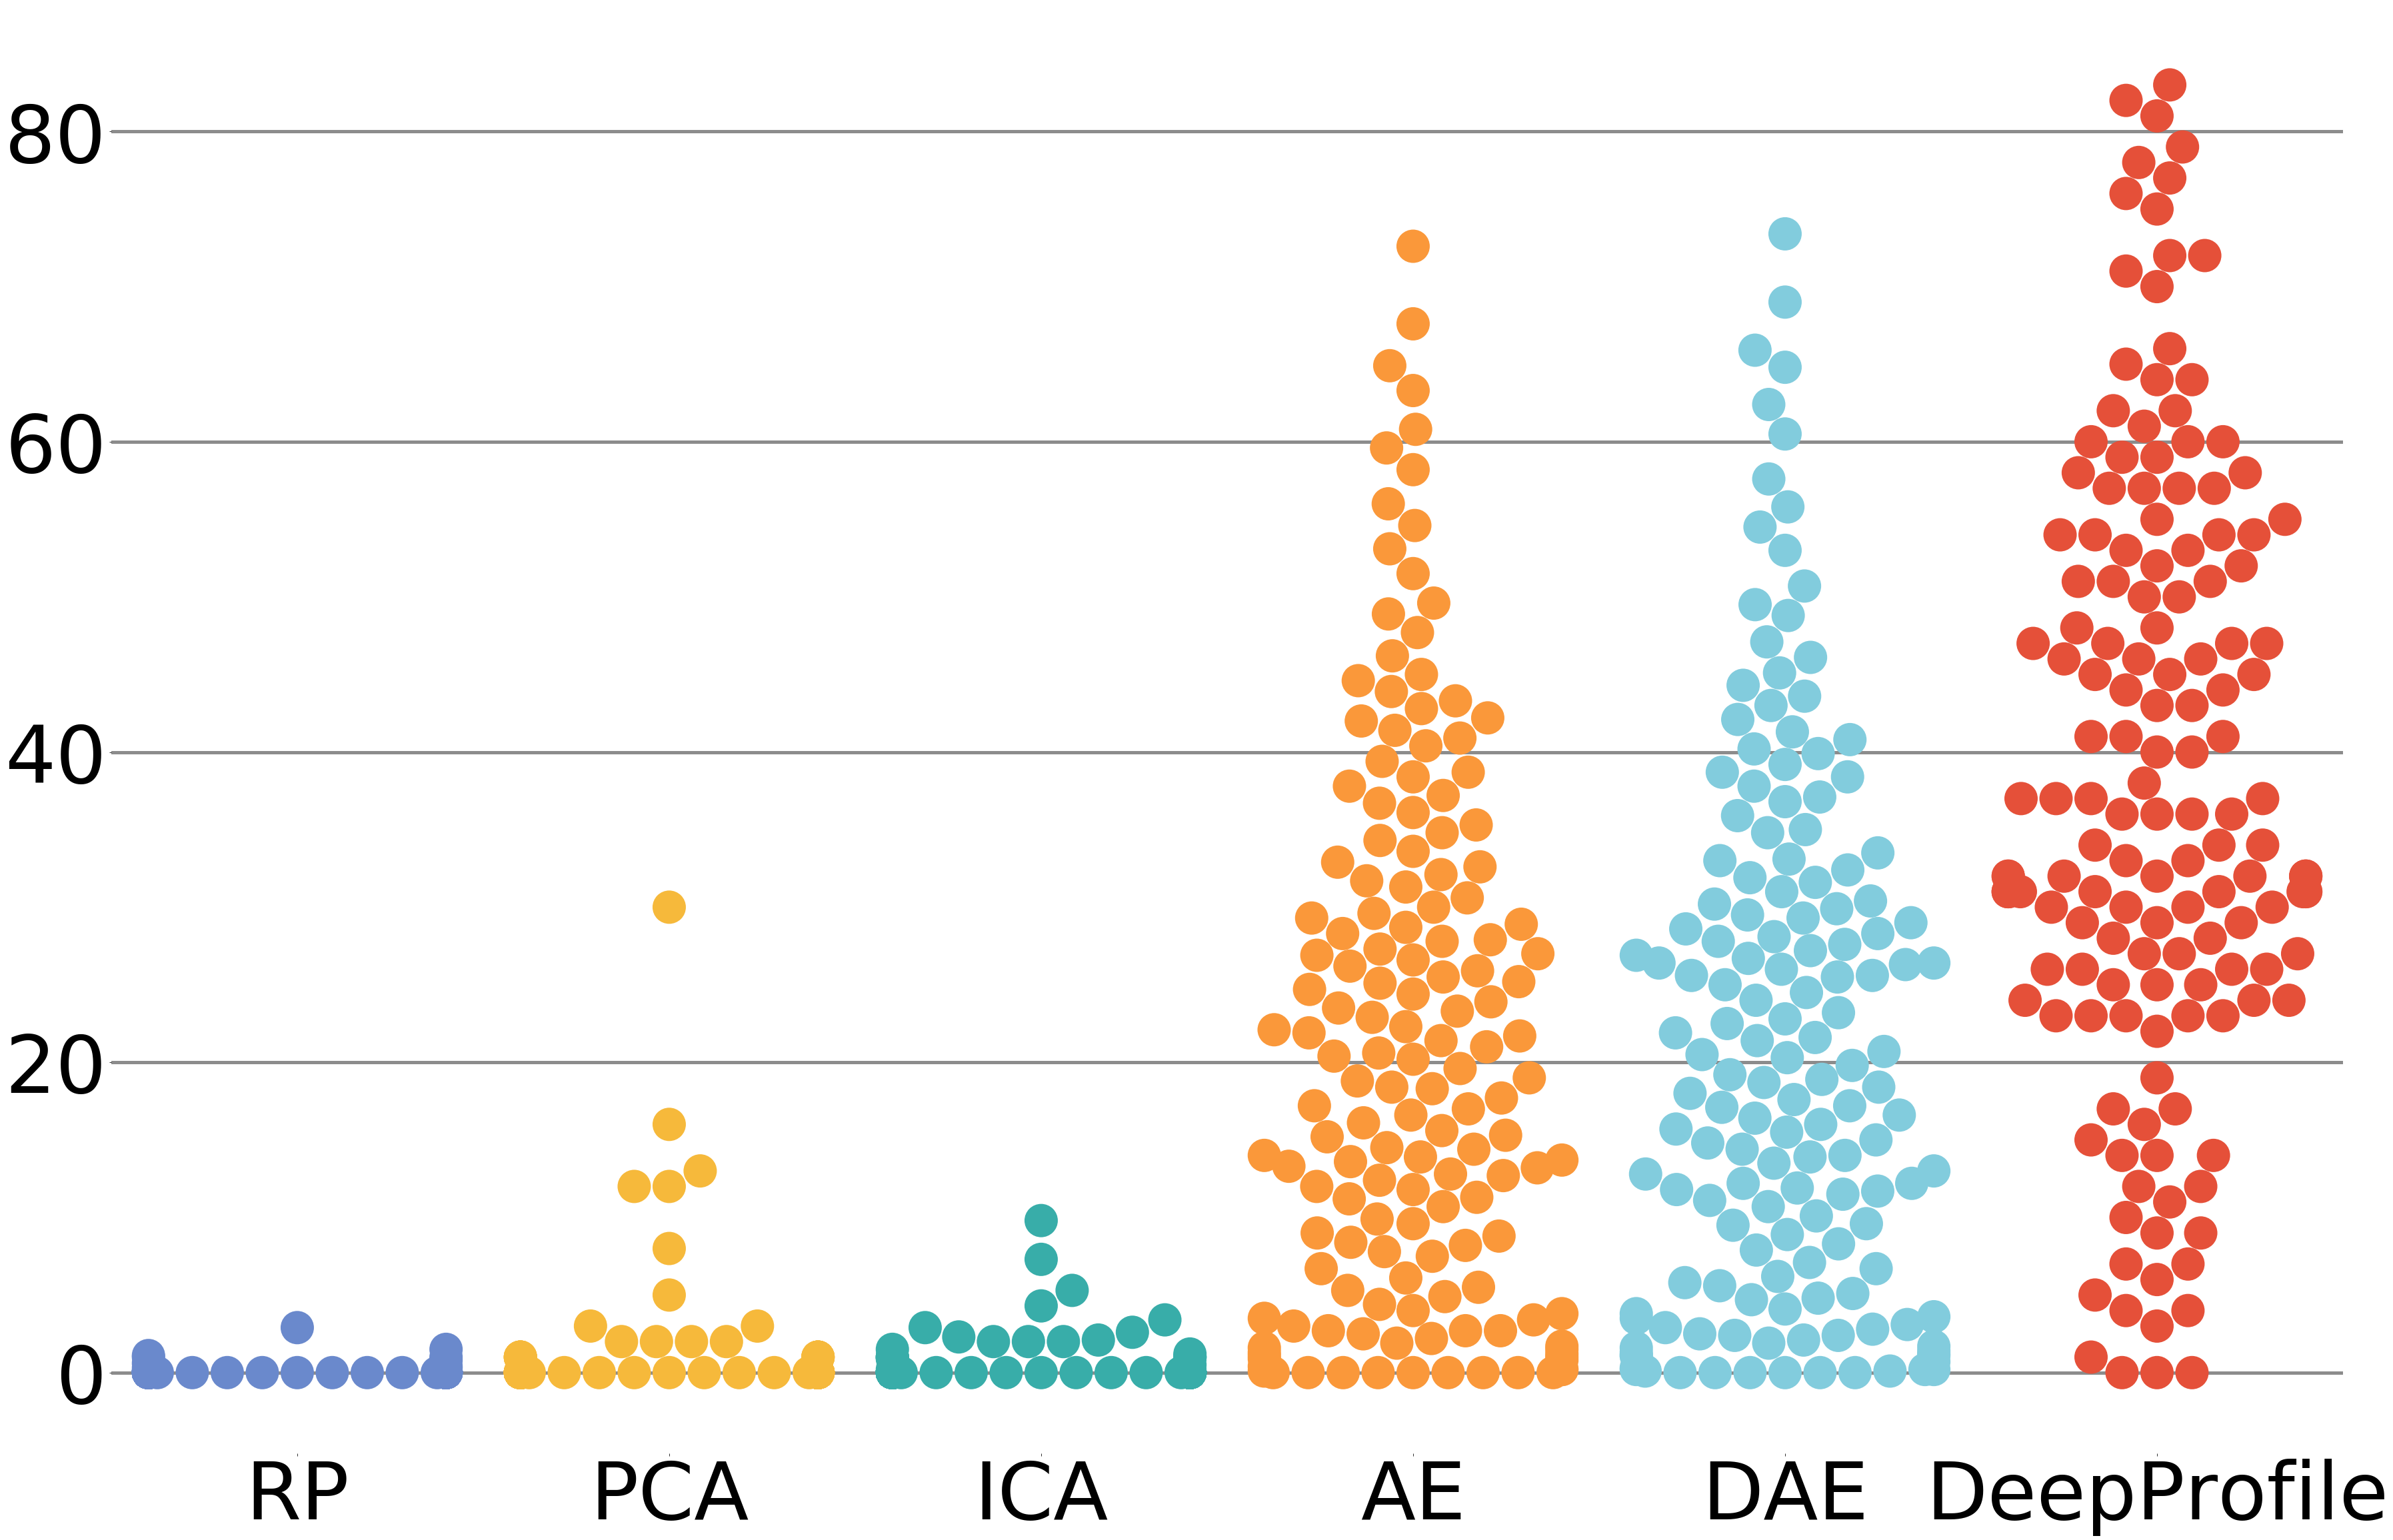

In [5]:
for cancer in cancer_types:
    print(cancer)
    createPlot(cancer)